In [1]:
#  Install the required library (if not already installed)
#!pip install pdfplumber

# Import necessary modules
import pdfplumber  #Package for reading PDF text/tables
import pandas as pd  # For storing table data as DataFrames
import time

timing_profile_pdfplumber = {}
# Define path to your PDF file
pdf_path = "C:\\Users\\ramum\\Q3FY25 Earnings Presentation V16.pdf"
start = time.time()
# Initialize lists to store extracted content
all_text = []      # For storing page-wise extracted text
all_tables = []    # For storing table DataFrames

# Open the PDF file using pdfplumber
with pdfplumber.open(pdf_path) as pdf:

    # Loop through each page of the PDF
    for i, page in enumerate(pdf.pages):

        print(f"\n Processing Page {i+1}")

        #  Extract plain text from the page
        # In background: It reads the PDF's character-level content, joins into lines
        text = page.extract_text()

        # If text is found, store it
        if text:
            all_text.append(text) #Appending all the text into the list
            print(text[:300])  # Show first 300 characters for preview

        # Extract tables (if any)
        # In background: pdfplumber identifies rows/columns using line intersections or whitespace patterns
        tables = page.extract_tables()

        # Loop through each found table
        for table in tables:
            # Convert list-of-lists (raw table rows) into a DataFrame
            # First row is used as header
            df = pd.DataFrame(table[1:], columns=table[0])
            all_tables.append(df)


for i, df in enumerate(all_tables):
    print(df)
timing_profile_pdfplumber["Tables_Extraction from pdf pdf_plumber"] = time.time() - start

timing_df1 = pd.DataFrame(list(timing_profile_pdfplumber.items()), columns=["Step", "Time (seconds)"])
print(timing_df1)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox



 Processing Page 1
Investor Presentation
Q3 | 9M FY25
February 4, 2025

 Processing Page 2
Index
Overview
Consolidated Financial Performance
Standalone Financial Performance
2

 Processing Page 3
NSE at a glance
~ 21 cr 10.9 cr 99.8%+ 2,673
Reach
Accounts Registered* Unique registered PIN Codes covered* Listed Companies*
investors*
₹14.1 tn ₹10.3 tn ₹3.8 tn ₹1.5 tn
Capital
Formation Total Fund Mobilization Capital raised through debt Capital raised through equity Equity capital raised
in 9MF

 Processing Page 4
NSE is India’s largest real-time financial ecosystem
Trading Exchange Clearing &
1 2 3 4 Others
Services Listing Settlement
1st 1st 1st 1,780
Largest Derivatives exchange1 Highest number of IPOs in Asia NSE Clearing was the first Member racks as part of
globally (by # of contracts) & highest equity 

 Processing Page 5
Market positioning across products (Q3FY25)
NSE Volume NSE Market
Market Growth
Growth Share
Cash Market 29% 32% 94%
Equity Futures 33% 33% 99.9%
Equity Options 

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Safe Harbor Statement
This presentation document is for your information and neither this presentation nor any part thereof shall be (i) copied, photocopied,
duplicated or otherwise reproduced in any form or by any means; or (iii) re-circulated, redistributed, passed on, published in any media,
webs

 Processing Page 19
Thank You
For any investor relation queries please contact
Email ID: ir@nse.co.in
Non-Confidential
                                     
0                            Overview
1                                    
2  Consolidated Financial Performance
3                                    
4    Standalone Financial Performance
5                                    
                                        In ₹ crores Q3\nFY25 Q2\nFY25  \
0                                      Total Income    4,807    5,023   
1                           Revenue from operations    4,349    4,510   
2   Total Expenses (incl. contribution to core SGF)    1,084    1,303   
3                    

In [2]:
#!pip install PyMuPDF
import fitz  # PyMuPDF
import pandas as pd
import time
timing_profile_PyMuPdf = {}
# Open PDF
start = time.time()
doc = fitz.open(pdf_path)


extracted_tables = []

# Loop through pages
for page_num in range(len(doc)):
    page = doc.load_page(page_num)

    # Extract largest text block (usually the title/header of section)
    blocks = page.get_text("dict")["blocks"]
    title_text = ""
    max_font_size = 0

    for b in blocks:
        if "lines" in b:
            for l in b["lines"]:
                for s in l["spans"]:
                    if s["size"] > max_font_size and len(s["text"].strip()) > 6:
                        title_text = s["text"].strip()
                        max_font_size = s["size"]

    # Detect tables using bbox-based clustering
    tables = page.find_tables()
    for idx, table in enumerate(tables):
        try:
            df = table.to_pandas()
            table_title = f"{title_text}" if title_text else f"Page_{page_num + 1}_Table_{idx + 1}"
            extracted_tables.append((table_title, df))
        except:
            continue

# Display output
for title, df in extracted_tables:
    print(f"\n Table Title: {title}")
    display(df)

timing_profile_PyMuPdf["Tables_Extraction from pdf PyMuPdf"] = time.time() - start

timing_df2 = pd.DataFrame(list(timing_profile_PyMuPdf.items()), columns=["Step", "Time (seconds)"])
print(timing_df2)




 Table Title: Financial Highlights


0-In ₹ crores 1-Q3\nFY25 2-Q2\nFY25  \
0                                      Total Income      4,807      5,023   
1                           Revenue from operations      4,349      4,510   
2   Total Expenses (incl. contribution to core SGF)      1,084      1,303   
3                                  Operating EBITDA      3,398      3,344   
4                       Operating EBITDA Margin (%)        78%        74%   
5                     Share of profit of associates         37         30   
6         Profit on sale of investment in associate      1,155          -   
7    Effect of discontinued operations (net of tax)         18        410   
8                                  Profit After Tax      3,834      3,137   
9                       Profit After Tax Margin (%)        64%        56%   
10             Earnings Per Share* (FV: ₹ 1) (in ₹)      15.49      12.68   
11                        Book Value per share* (₹)                         
12                    Return on Equity (Annualized)                         

   3-Q3\nFY24 4-Growth\nQoQ% 5-Growth\nYoY % Col6 7-9M\nFY25 8-9M\nFY24  \
0       3,974           (4)%             21%          14,780     11,354   
1       3,517           (4)%             24%          13,369     10,155   
2       1,369          (17)%           (21)%           3,917      3,645   
3       2,261             2%             50%           9,848      6,834   
4         64%                                            74%        67%   
5          30            23%             21%              91         78   
6           -            N/A             N/A           1,155          -   
7        (37)          (96)%             N/A             399       (88)   
8       1,975            22%             94%           9,538      5,818   
9         50%                                            58%        51%   
10       7.98                                          38.54      23.51   
11                                                    111.87      90.07   
12                                                       46%        35%   

   9-Growth\nYoY %  
0              30%  
1              32%  
2               7%  
3              44%  
4                   
5              16%  
6              N/A  
7              N/A  
8              64%  
9                   
10                  
11                  
12


 Table Title: Total Income


0-In ₹ crores 1-Q3\nFY25 2-Q2\nFY25  \
0                         Transaction charges      3,445      3,586   
1                            Listing services         99         80   
2                  Data Centre & Connectivity        305        294   
3               Data Feed & Terminal services        103        104   
4   Index licensing &\nData subscription fees         32         28   
5              Clearing & Settlement Services         84        101   
6                 Operating investment income        221        259   
7                      Other operating income         60         58   
8                 Revenue from operations (I)      4,349      4,510   
9                       Income on investments        447        504   
10                 Other non-operating income         10          9   
11                          Other income (II)        457        513   
12                      Total Income (I + II)      4,807      5,023   

   3-Q3\nFY24 4-Growth\nQoQ% 5-Growth\nYoY %  \
0       2,819           (4)%             22%   
1          62            24%             60%   
2         229             4%             33%   
3          91             0%             14%   
4          23            13%             40%   
5          46          (17)%             83%   
6         215          (15)%              3%   
7          32             2%             87%   
8       3,517           (4)%             24%   
9         454          (11)%            (1)%   
10          3             3%              NM   
11        457          (11)%              NM   
12      3,974           (4)%             21%   

   6-Composition of\nTotal Income\nQ3 FY25 Col7 8-9M\nFY25 9-9M\nFY24  \
0                                      72%          10,684      8,375   
1                                       2%             247        166   
2                                       6%             861        644   
3                                       2%             307        248   
4                                       1%              87         78   
5                                       2%             266         70   
6                                       5%             748        461   
7                                       1%             169        113   
8                                      91%          13,369     10,155   
9                                       9%           1,387      1,189   
10                                      0%              24          9   
11                                     10%           1,411      1,198   
12                                    100%          14,780     11,354   

   10-Growth\nYoY %  
0               28%  
1               49%  
2               34%  
3               24%  
4               12%  
5              278%  
6               62%  
7               50%  
8               32%  
9               17%  
10             155%  
11              18%  
12              30%


 Table Title: Total Expenditure


In ₹ crores Q3\nFY25 Q2\nFY25 Q3\nFY24  \
0                        Employee Cost      163      194      117   
1                      Regulatory Fees      240      300      251   
2  Depreciation & amortisation expense      132      137      113   
3                       Other expenses      480    1,098      332   
4                  Technology expenses      270      225      151   
5       SEBI Settlement fees / Penalty        -      670        -   
6                       Other expenses      210      203      180   
7     Total Expenses (as per LODR) (I)    1,015    1,730      813   
8        Contribution to Core SGF (II)       68    (426)      556   
9           Total Expenditure (I + II)    1,084    1,303    1,369   

  Growth\nQoQ% Growth\nYoY % Composition of\nTotal Expenditure\nQ3 FY25 Col7  \
0        (16)%           39%                                        15%        
1        (20)%          (5)%                                        22%        
2         (3)%           17%                                        12%        
3        (56)%           45%                                        45%        
4          20%           79%                                        25%        
5          N/A           N/A                                          -        
6           3%           16%                                        20%        
7        (41)%           25%                                        94%        
8          N/A         (88)%                                         6%        
9        (17)%         (21)%                                       100%        

  9M\nFY25 9M\nFY24 Growth\nYoY%  
0      505      342          48%  
1      809      679          19%  
2      395      323          22%  
3    1,979    1,134          74%  
4      708      537          32%  
5      670       73          N/A  
6      601      524          15%  
7    3,687    2,478          49%  
8      229    1,167        (80)%  
9    3,917    3,645           7%


 Table Title: Key Ratios


Col0  Col1  \
0  10,000\n509%,000\n408%,000\n7,000\n30%\n6,000\...  None   
1     Profit before tax – Continuing operations\n90%         
2                                                     None   
3  79% 79% 75% 82%\n80% 68% 69%\n12,7000%0\n60%\n...  None   
4               PBT – continuing operations margin %  None   

  90%\n80% 80% 74% 78%\n80% 67%\n64%\n12,000\n70%\n6100%,000\n50%\n8,000\n40%\n6,000\n30% 9,428 9,870\n204%,000 6,691\n10 2% ,000 3,344 3,398\n2,261\n0%\n0\nFY22 FY23 FY24 Q3 FY24 Q2 FY25 Q3 FY25\nOperating EBITDA Operating EBITDA margin %  \
0                                               None                                                                                                                                                                                              
1                                                                                                                                                                                                                                                 
2  70%\n60% 58% 64%\n56%\n60% 51% 50%\n50%\n408%,...                                                                                                                                                                                              
3                                               None                                                                                                                                                                                              
4                                               None                                                                                                                                                                                              

               Col3 74% 78%  
0              None    None  
1  Profit after tax    None  
2              None    None  
3              None    None  
4              None    None


 Table Title: Consolida


0-Particulars 1-for the quarter ended  \
0                                                None                  Dec-24   
1                               Continuing Operations                           
2                                              Income                           
3                         (a) Revenue from operations                   4,349   
4                                    (b) Other Income                     457   
5                                  Total Income (a+b)                   4,807   
6                                            Expenses                           
7                       (a) Employee benefits expense                     163   
8                                 (b) Regulatory fees                     240   
9           (c) Depreciation and amortisation expense                     132   
10                                 (d) Other expenses                     480   
11                           Total expenses (a+b+c+d)                   1,015   
12                                                                              
13  Profit before Exceptional Items, contribution ...                   3,791   
14           Add : Share of net profits of associates                      37   
15  Less : Contribution, net of provision reversal...                      68   
16    Add : Profit on sale of investment in associate                   1,155   
17       Profit before tax from continuing operations                   4,915   
18                           Less: Income Tax expense                   1,099   
19  Profit for the period / year from continuing o...                   3,815   
20  Profit / (Loss) from discontinued operations (...                      18   
21                       Profit for the period / year                   3,834   
22                                            EPS (₹)                  15.49*   

      Col2    Col3 4-Growth  Col5 6-Nine months ended    Col7 8-Growth  \
0   Sep-24  Dec-23     QoQ%  YoY%              Dec 24  Dec 23     YoY%   
1                                                                        
2                                                                        
3    4,510   3,517     (4)%   24%              13,369  10,155      32%   
4      513     457    (11)%    NM               1,411   1,198      18%   
5    5,023   3,974     (4)%   21%              14,780  11,354      30%   
6                                                                        
7      194     117    (16)%   39%                 505     342      48%   
8      300     251    (20)%  (5)%                 809     679      19%   
9      137     113     (3)%   17%                 395     323      22%   
10   1,098     332    (56)%   45%               1,979   1,134      74%   
11   1,730     813    (41)%   25%               3,687   2,478      48%   
12                                                                       
13   3,294   3,161      15%   20%              11,093   8,875      25%   
14      30      30      23%   21%                  91      78      16%   
15   (426)     556        -    NM                 229   1,167    (80)%   
16       -       -       NM    NM               1,155       -       NM   
17   3,750   2,635      31%   87%              12,109   7,787      56%   
18   1,023     622       7%   77%               2,971   1,881      58%   
19   2,727   2,012      40%   90%               9,138   5,906      55%   
20     410    (37)    (96)%    NM                 399    (88)       NM   
21   3,137   1,975      22%   94%               9,538   5,818      64%   
22  12.68*   7.98*                             38.54*  23.51*            

   9-Year\nIn ₹ crores\nended  
0                      Mar-24  
1                              
2                              
3                      14,780  
4                       1,654  
5                      16,434  
6                              
7                         460  
8                         981 


 Table Title: Normalized Consolidated Results


0-Particulars  \
0                                  Profit Before Tax   
1     Continuing operations\nDiscontinued operations   
2                                  Profit Before Tax   
3                 Less: Gain from sale of associates   
4               Less: Gain from sale of subsidiaries   
5                          Add: SEBI Settlement Fees   
6  Add: Additional Contribution / provision\n(Pro...   
7                          Total one-off adjustments   
8                     Profit before tax (Normalized)   

                       1-Q3\nFY25 2-Q2\nFY25 3-Q3\nFY24 4-Growth\nQoQ %  \
0                                                                         
1  4,915 3,750 2,635\n25 516 (34)       None       None                   
2                           4,939      4,265      2,601             16%   
3                         (1,155)                                         
4                            (14)      (532)                              
5                             670       None       None                   
6                                      (500)        500                   
7                         (1,169)      (362)        500                   
8                           3,770      3,903      3,101            (3)%   

  5-Growth\nYoY%              6-9M\nFY25 7-9M\nFY24 8-Growth\nYoY%  
0                                                                   
1           None  12,109 7,787\n518 (70)       None                 
2            90%                  12,627      7,717            64%  
3                                (1,155)                            
4                                  (546)                            
5           None                  670 73       None                 
6                                             1,000                 
7                                 (1031)      1,073                 
8            22%                  11,596      8,790            32%


 Table Title: Financial Highlights


0-In ₹ crores 1-Q3\nFY25 2-Q2\nFY25  \
0                                      Total Income      4,289      5,297   
1                           Revenue from operations      3,945      4,042   
2   Total Expenses (incl. contribution to core SGF)      1,241      1,546   
3                                  Operating EBITDA      2,807      2,604   
4                       Operating EBITDA Margin (%)        71%        64%   
5                                 Profit Before Tax      3,048      3,751   
6                      Profit Before Tax Margin (%)        71%        71%   
7                                  Profit After Tax      2,291      2,954   
8                       Profit After Tax Margin (%)        53%        56%   
9                Earnings per share* (FV: Re 1) (₹)       9.26      11.93   
10                        Book Value per share* (₹)                         
11                    Return on Equity (Annualized)                         

   3-Q3\nFY24 4-Growth\nQoQ% 5-Growth\nYoY % Col6 7-9M\nFY25 8-9M\nFY24  \
0       3,452          (19%)             24%          13,964     10,491   
1       3,170           (2%)             24%          12,038      9,388   
2       1,620          (20%)           (23%)           4,550      4,213   
3       1,636             8%             72%           7,799      5,422   
4         52%                                            65%        58%   
5       1,832          (19%)             66%           9,414      6,279   
6         53%                                            67%        60%   
7       1,377          (22%)             66%           7,205      4,779   
8         40%                                            52%        46%   
9        5.57                                          29.11      19.31   
10                                                     89.42      70.72   
11                                                       44%        36%   

   9-Growth\nYoY %  
0              33%  
1              28%  
2               8%  
3              44%  
4                   
5              50%  
6                   
7              51%  
8                   
9                   
10                  
11


 Table Title: Transaction Charges


Average Daily Volumes (in ₹ crores)      Col1      Col2      Col3  \
0                                          None      None      None   
1                                       Q3 FY25   Q2 FY25   Q3 FY24   
2              Number of Trading Days        62        64        61   
3                         Cash Market  1,04,115  1,29,049    80,427   
4                      Equity Futures  1,71,825  2,01,615  1,31,010   
5     Equity Options\n(Premium Value)    61,295    65,653    56,707   
6                Currency Derivatives     6,559     3,407    28,900   

            Col4          Col5  
0           None          None  
1  Growth\nQoQ %  Growth\nYoY%  
2                               
3          (19)%           29%  
4          (15)%           31%  
5           (7)%            8%  
6            93%         (77)%


 Table Title: Standalone Financial Results


0-Particulars 1-for the quarter ended  \
0                                                None                  Dec-24   
1                                              Income                           
2                         (a) Revenue from operations                   3,945   
3                                    (b) Other Income                     344   
4                                  Total Income (a+b)                   4,289   
5                                            Expenses                           
6                       (a) Employee benefits expense                     115   
7                   (b) Clearing & Settlement Charges                     375   
8                            (c) SEBI Regulatory fees                     239   
9           (d) Depreciation and amortisation expense                     103   
10                                 (e) Other expenses                     341   
11                         Total expenses (a+b+c+d+e)                   1,173   
12                                                                              
13                     Profit before Core SGF and Tax                   3,116   
14  Less : Contribution, net of provision\nreversa...                      68   
15                                  Profit before tax                   3,048   
16                           Less: Income Tax expense                     757   
17                       Profit for the period / year                   2,291   
18                                            EPS (₹)                   9.26*   

      Col2    Col3 4-Growth   Col5 6-Nine months\nended    Col7 8-Growth  \
0   Sep-24  Dec-23    QoQ %   YoY%               Dec-24  Dec-23     YoY%   
1                                                                          
2    4,042   3,170     (2)%    24%               12,038   9,388      28%   
3    1,255     283    (73)%    22%                1,926   1,103      75%   
4    5,297   3,452    (19)%    24%               13,964  10,491      33%   
5                                                                          
6      136      85    (16)%    35%                  355     248      43%   
7      452     331    (17)%    13%                1,217     856      42%   
8      300     251    (20)%   (5)%                  807     677      19%   
9      108      87     (4)%    19%                  310     247      26%   
10     977     311    (65)%    10%                1,631   1,018      60%   
11   1,973   1,064    (41)%    10%                4,320   3,046      42%   
12                                                                         
13   3,324   2,388     (6)%    31%                9,643   7,445      30%   
14   (426)     556      N/A  (88)%                  229   1,167    (80)%   
15   3,751   1,832    (19)%    66%                9,414   6,279      50%   
16     797     455     (5)%    66%                2,209   1,499      47%   
17   2,954   1,377    (22)%    66%                7,205   4,779      51%   
18  11.93*   5.57*                               29.11*  19.31*            

   9-Year ended  
0        Mar-24  
1                
2        13,511  
3         1,449  
4        14,959  
5                
6           333  
7         1,241  
8           979  
9           339  
10        1,506  
11        4,398  
12               
13       10,562  
14        1,741  
15        8,821  
16        2,185  
17        6,635  
18        26.81


 Table Title: Normalized Standalone Results


0-Particulars 1-Q3\nFY25 2-Q2\nFY25  \
0                                  Profit before tax      3,048      3,751   
1                          Less: Subsidiary Dividend          -      (855)   
2  - 643 - 643 50\nAdd: SEBI Settlement Fees /Pen...       None       None   
3  Add: Additional Contribution / provision\n(Pro...          -      (500)   
4                          Total one-off adjustments          -      (712)   
5                     Profit before tax (Normalized)      3,048      3,039   

  3-Q3\nFY24 4-Growth\nQoQ % 5-Growth\nYoY% 6-9M\nFY25 7-9M\nFY24  \
0      1,832           (19)%            66%      9,414      6,279   
1          -                                     (855)      (242)   
2       None            None           None       None       None   
3        500                                         -      1,000   
4        500                                     (212)        808   
5      2,332              NM            31%      9,202      7,087   

  8-Growth\nYoY%  
0            50%  
1                 
2           None  
3                 
4                 
5            30%

                                 Step  Time (seconds)
0  Tables_Extraction from pdf PyMuPdf        5.001755


 Found 4 image(s) on Page 1


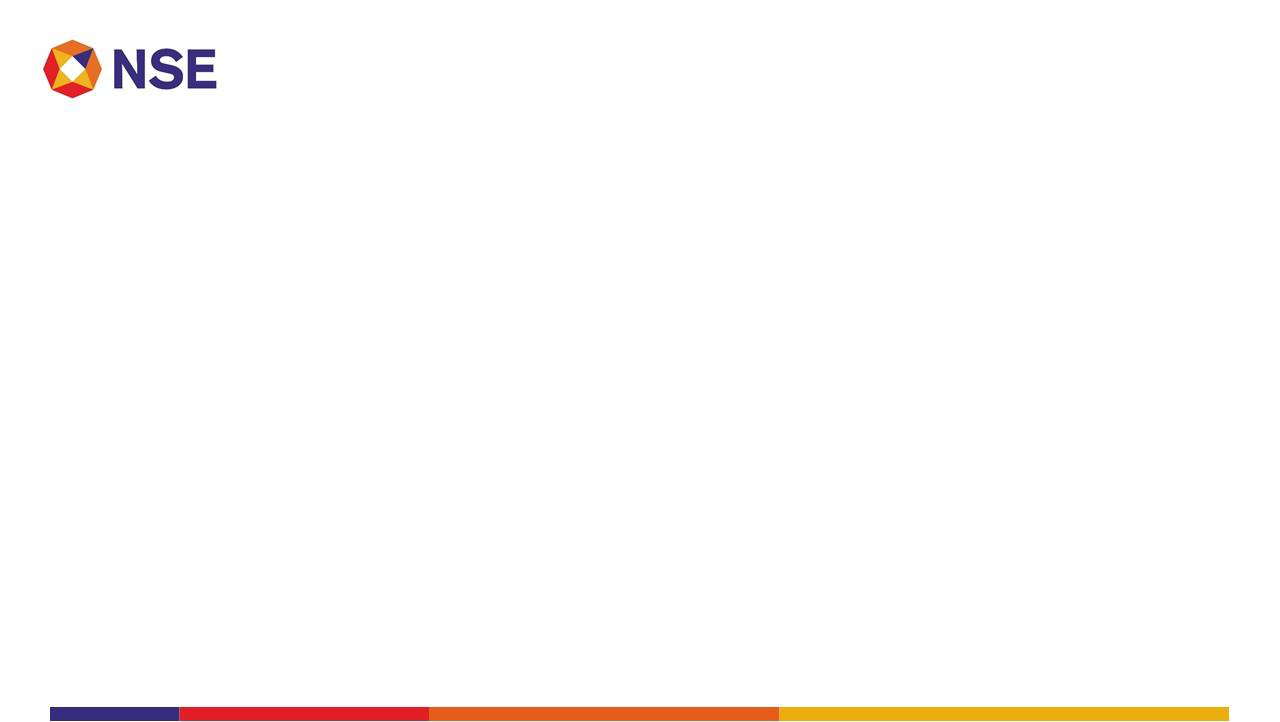

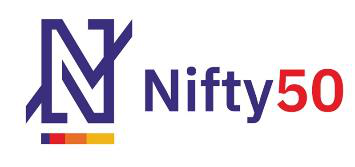

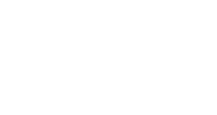

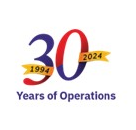

 Found 1 image(s) on Page 2


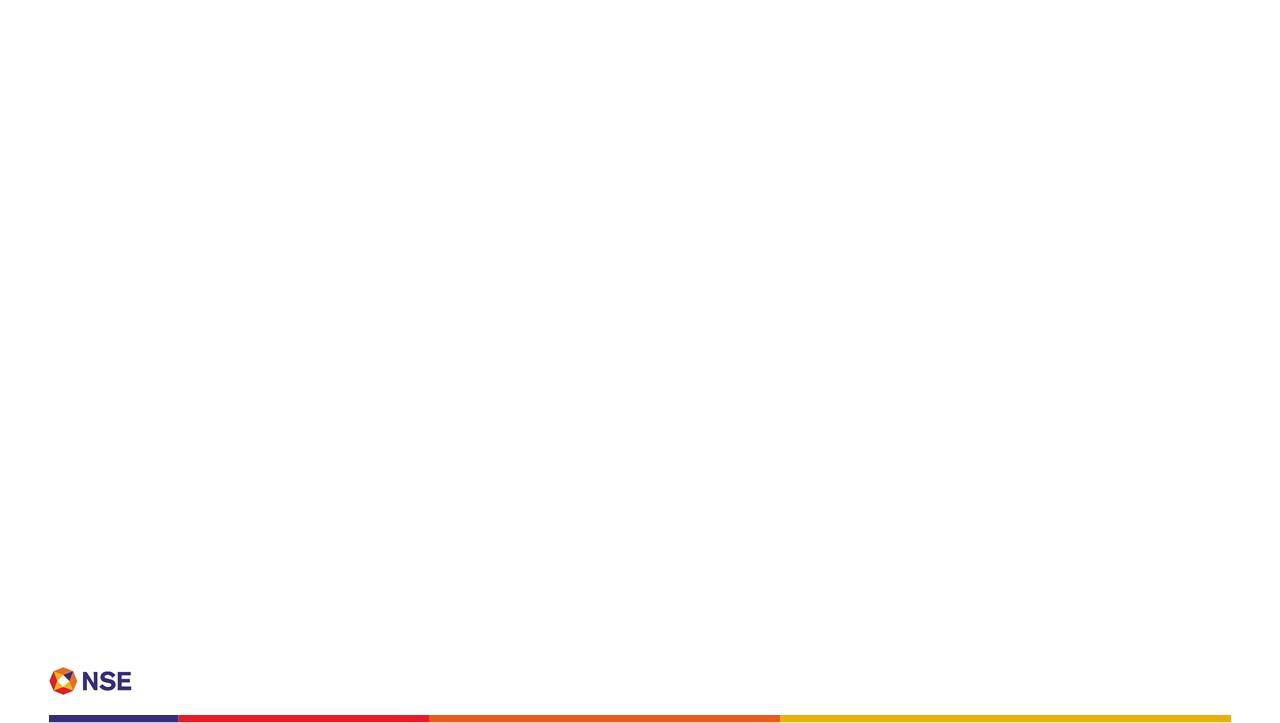

 Found 4 image(s) on Page 3


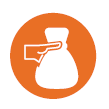

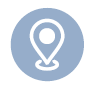

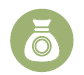

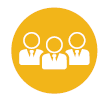

 Found 6 image(s) on Page 4


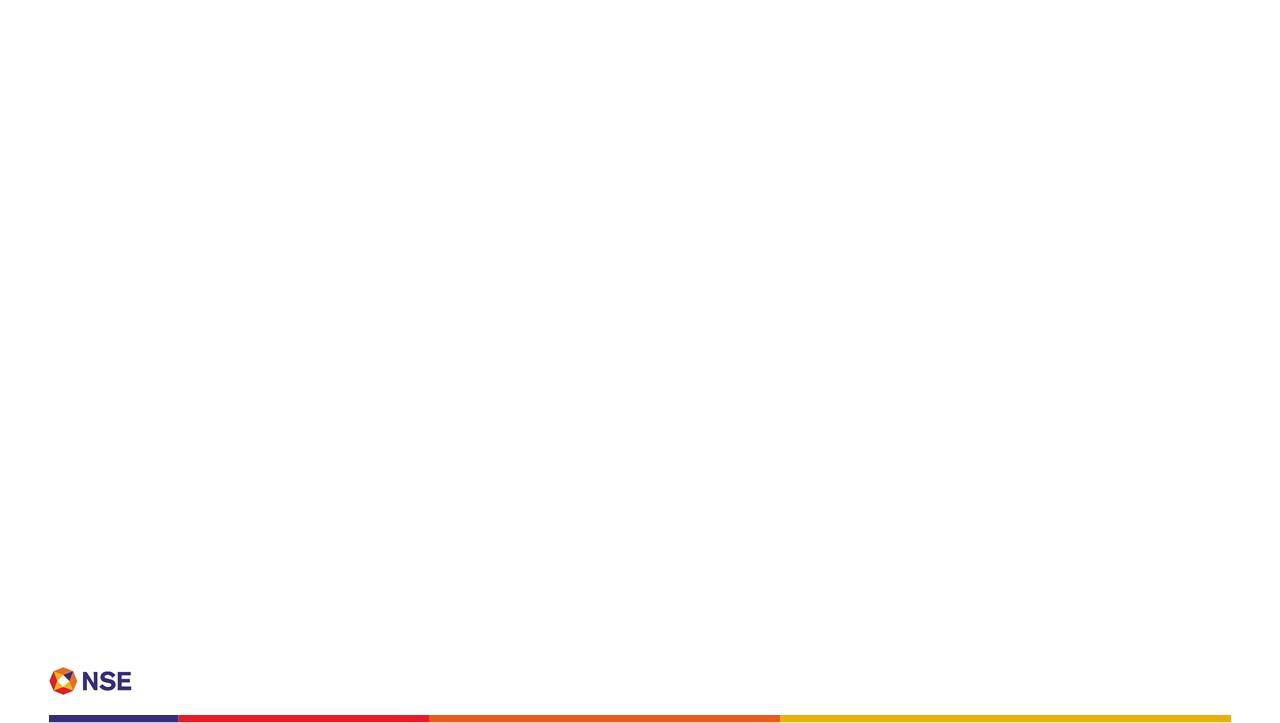

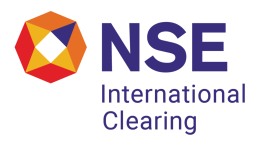

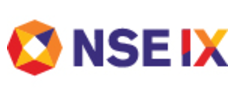

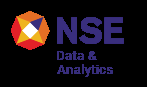

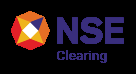

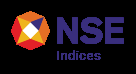

 Found 3 image(s) on Page 5


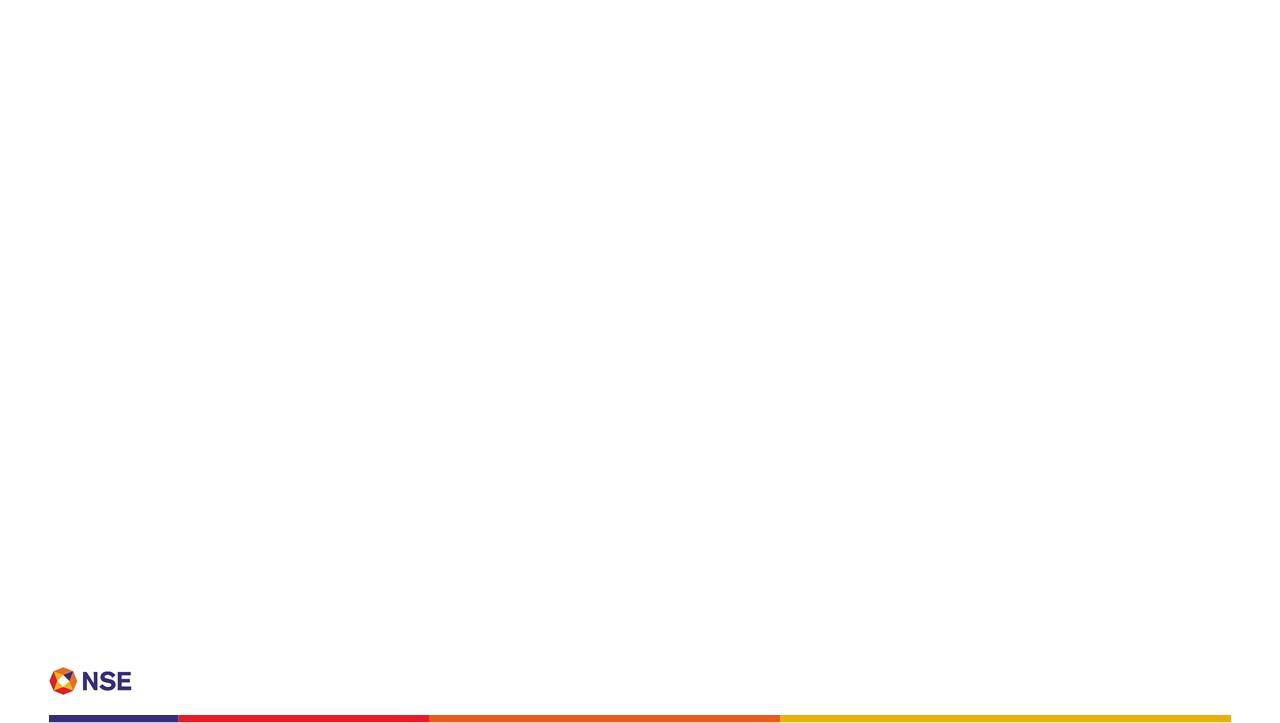

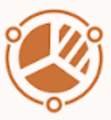

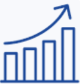

 Found 1 image(s) on Page 6


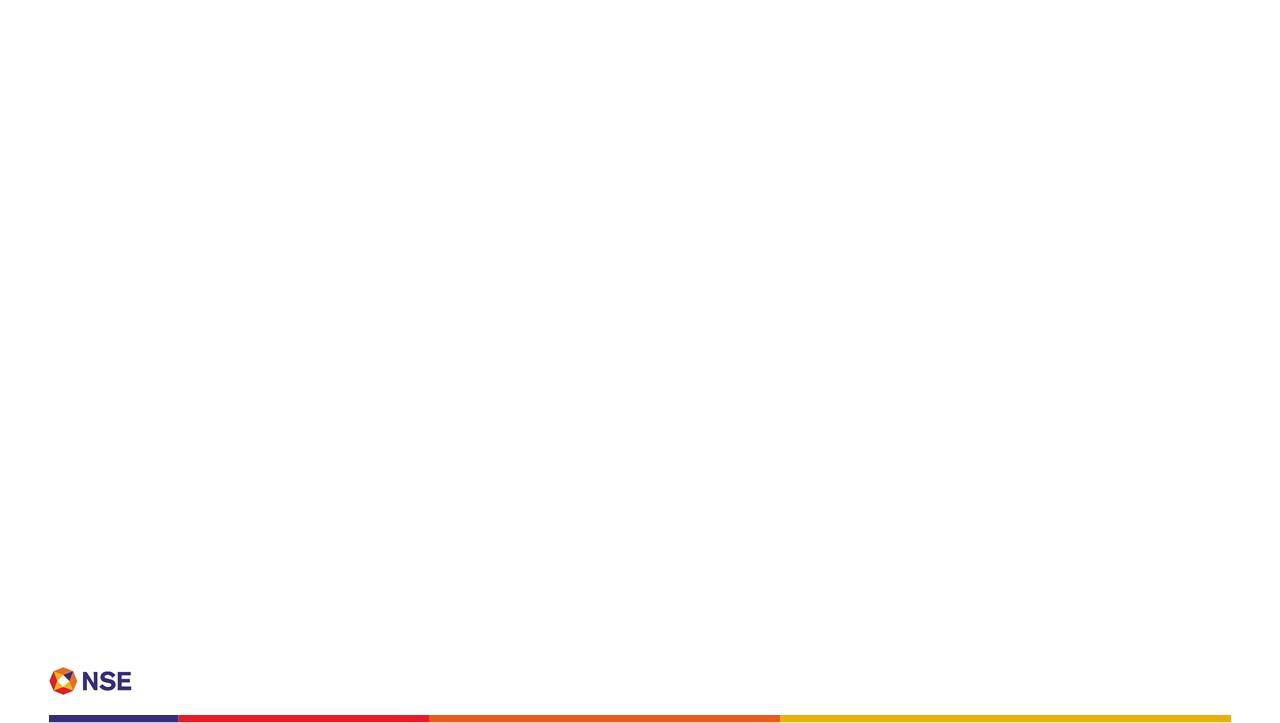

 Found 1 image(s) on Page 7


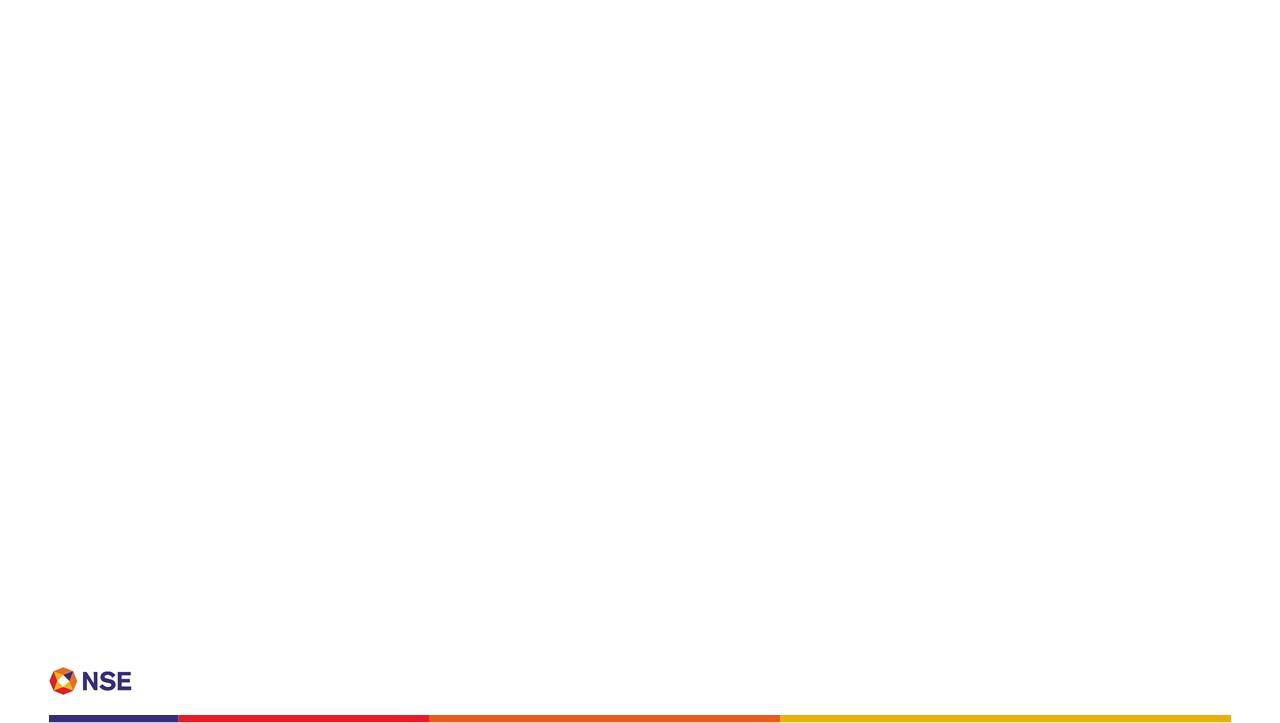

 Found 1 image(s) on Page 8


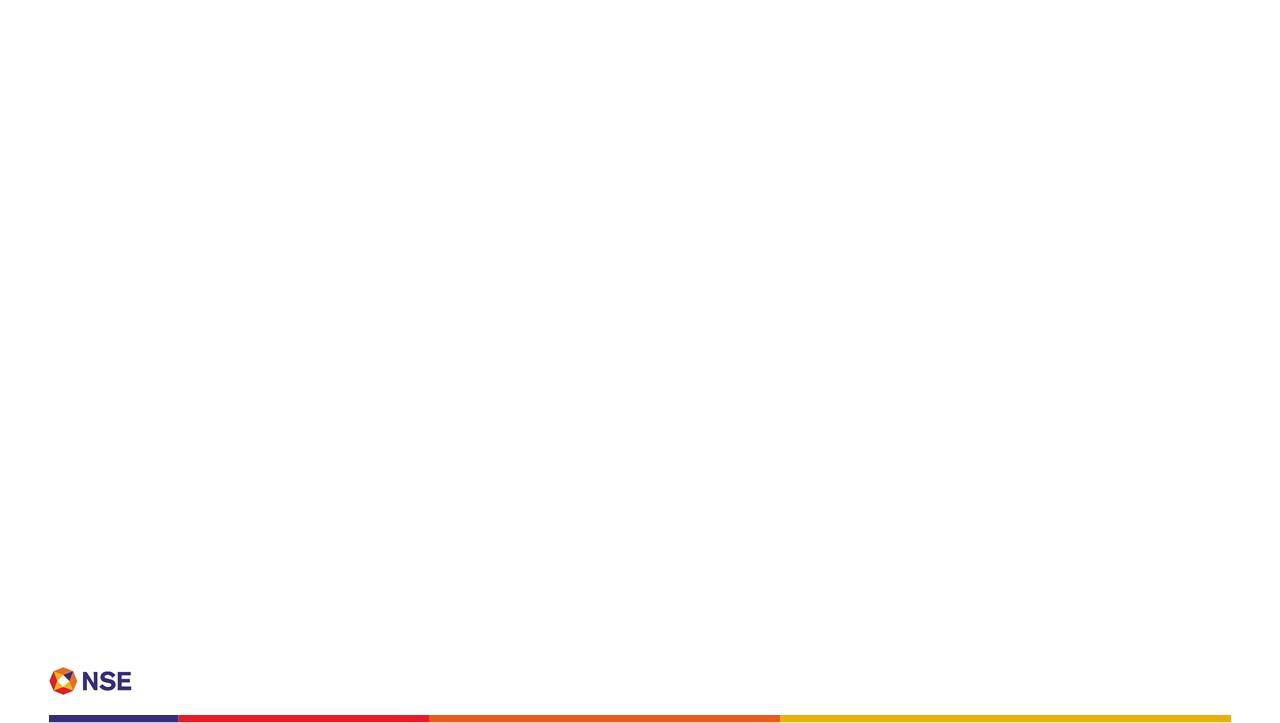

 Found 1 image(s) on Page 9


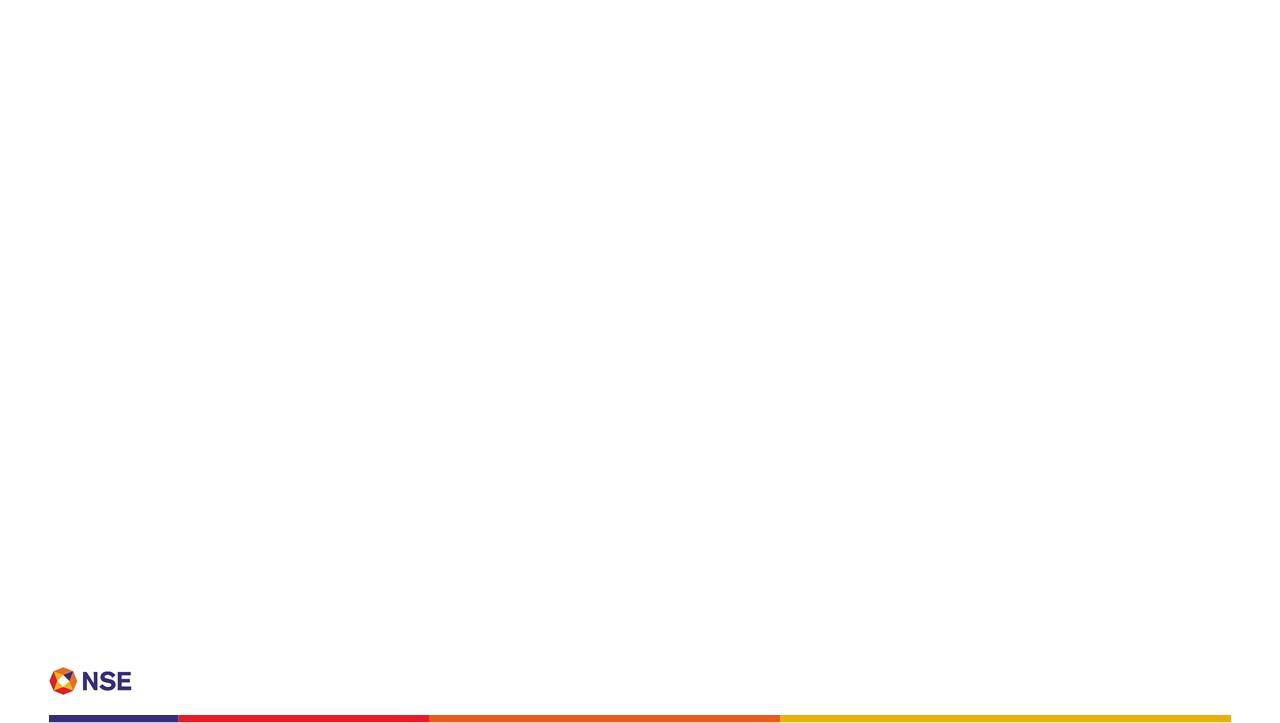

 Found 1 image(s) on Page 10


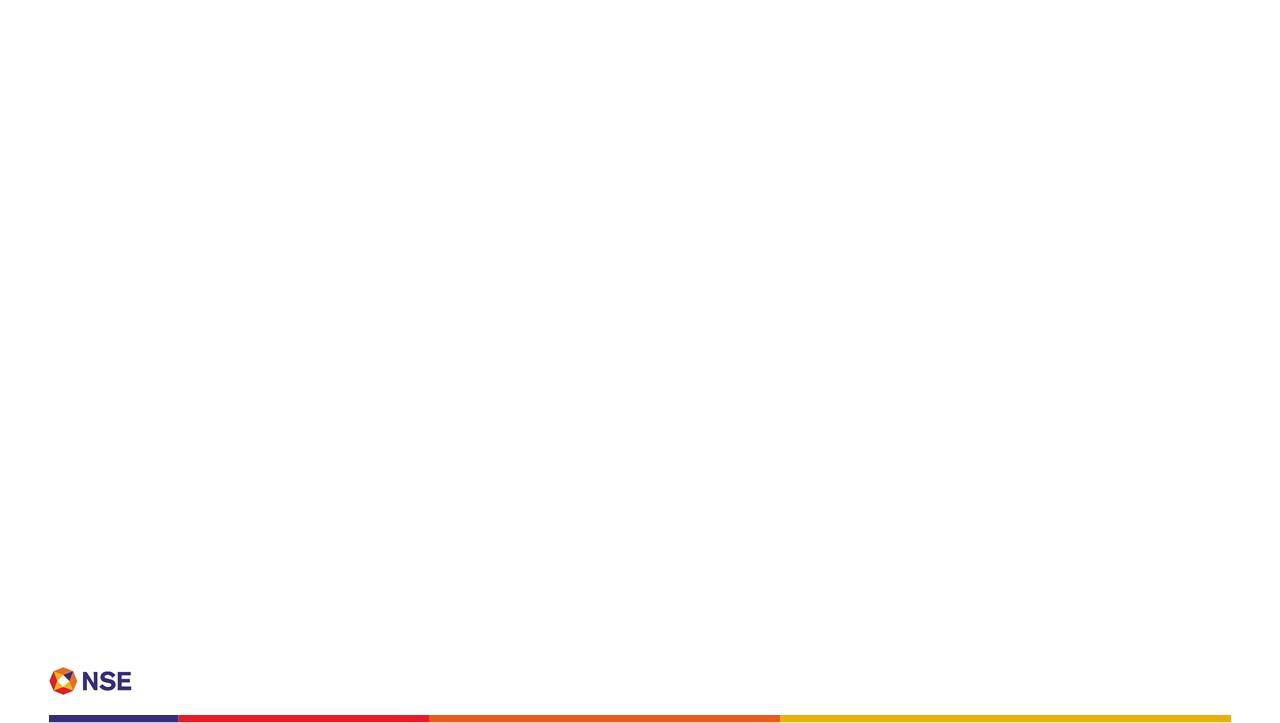

 Found 1 image(s) on Page 11


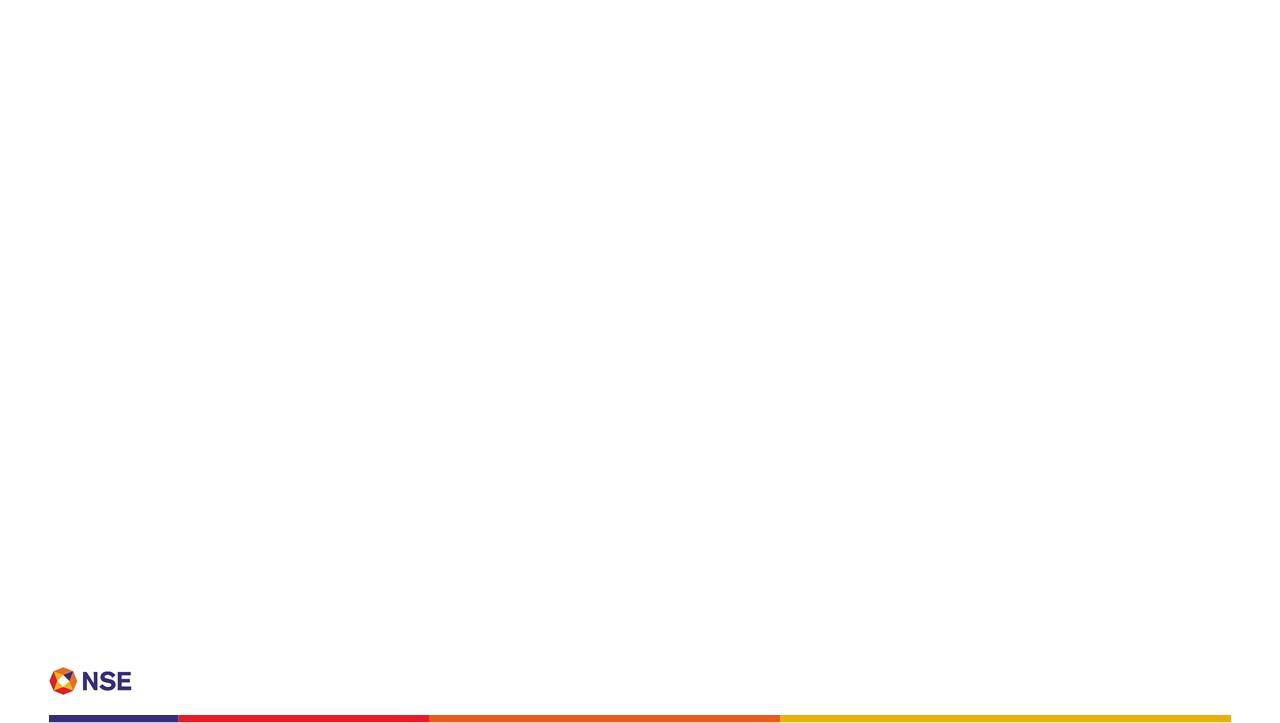

 Found 1 image(s) on Page 12


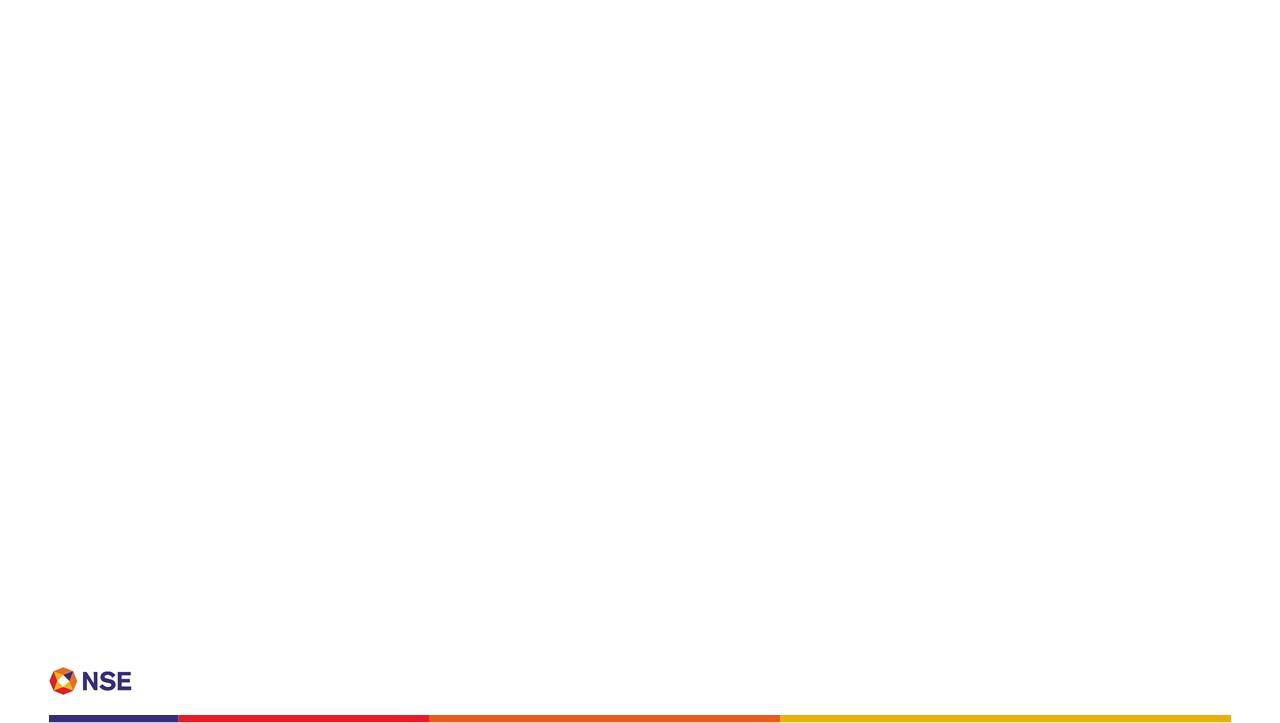

 Found 1 image(s) on Page 13


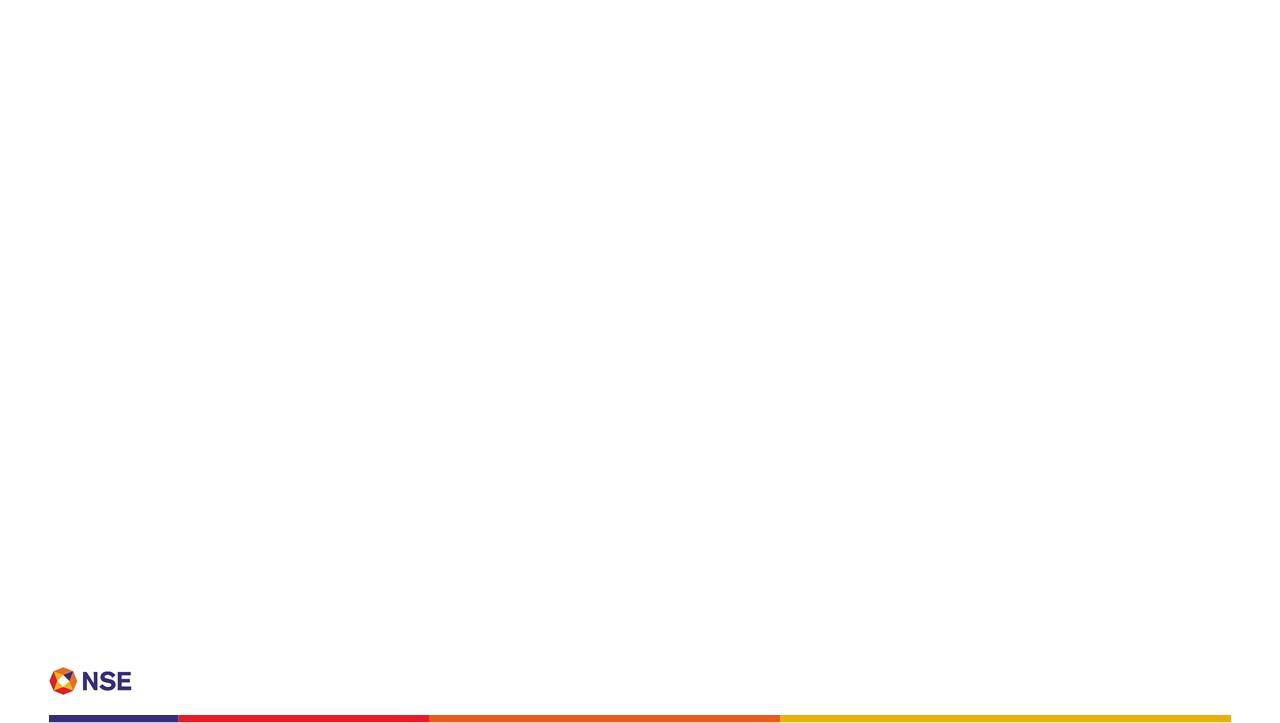

 Found 1 image(s) on Page 14


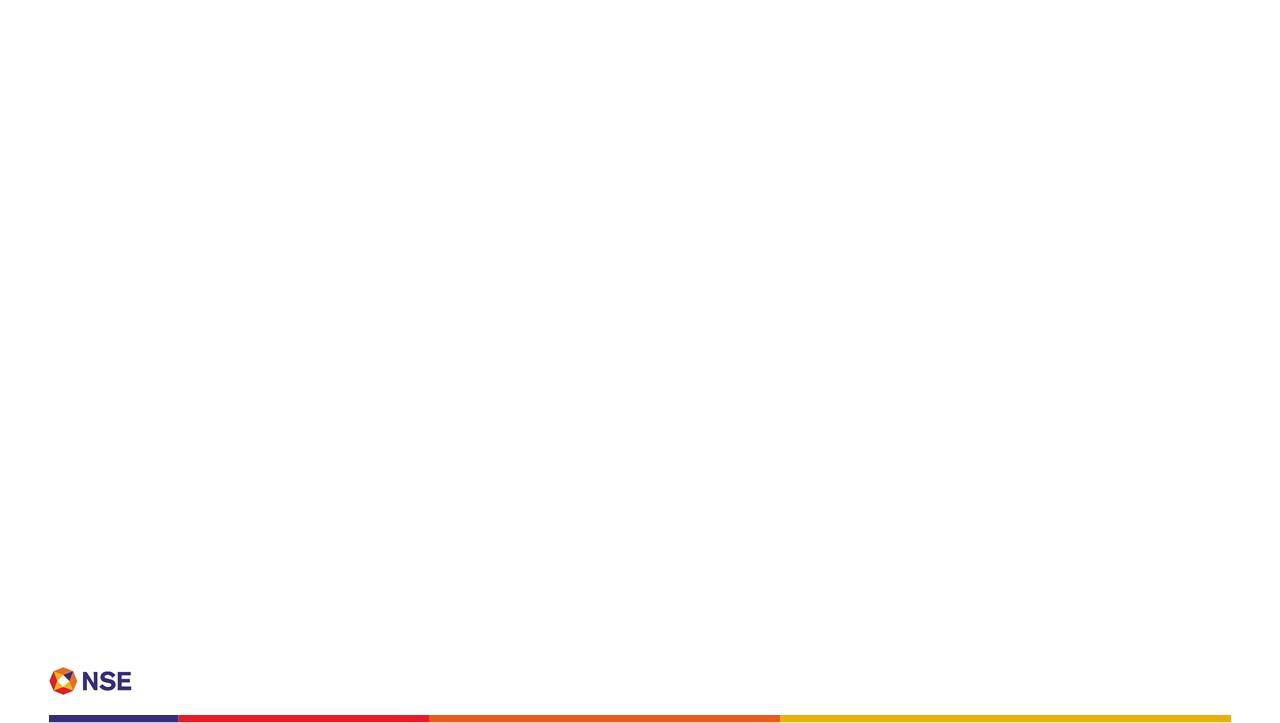

 No images found on Page 15
 Found 1 image(s) on Page 16


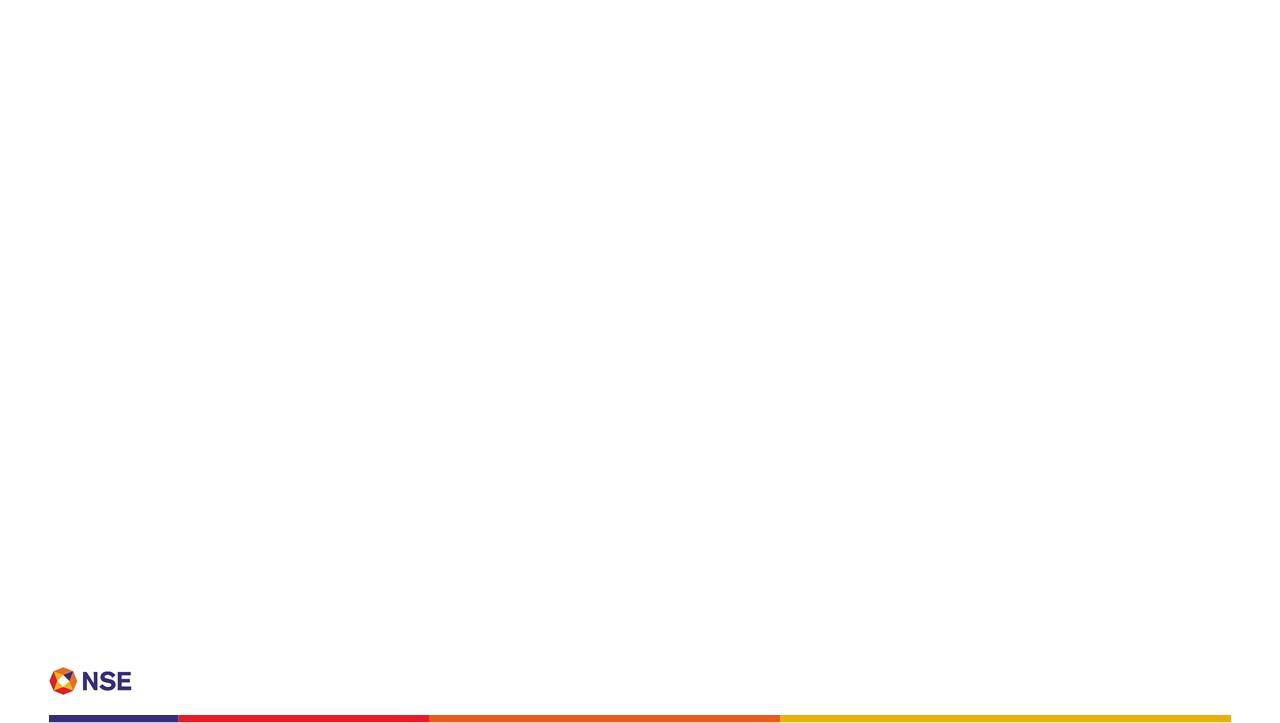

 Found 1 image(s) on Page 17


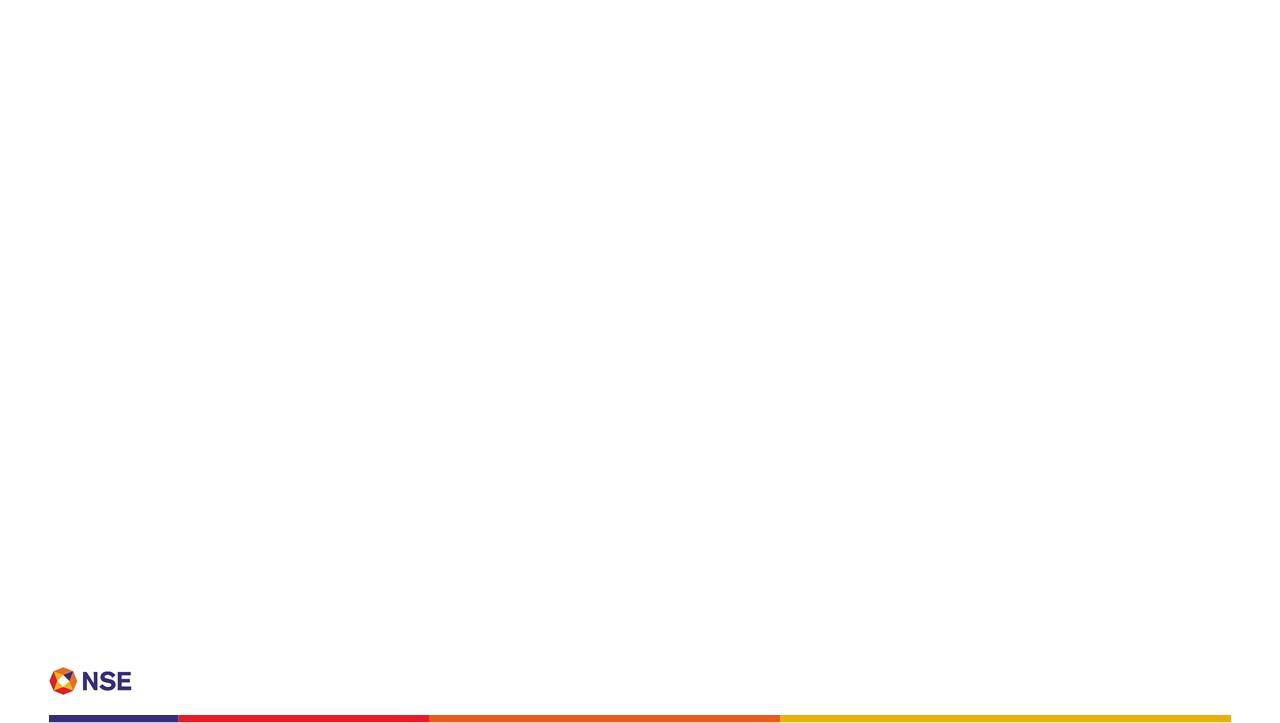

 No images found on Page 18
 Found 2 image(s) on Page 19


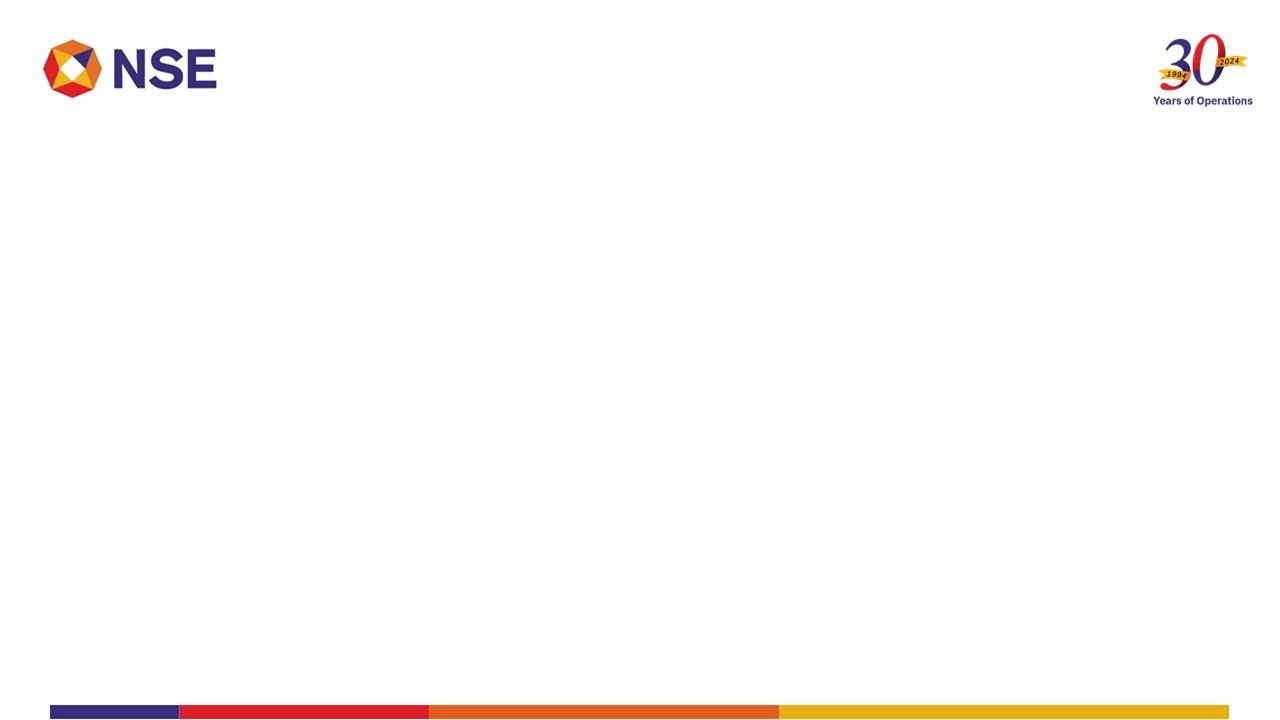

                        Step  Time (seconds)
0  Image_Extraction from pdf        1.610543


In [3]:
# Install PyMuPDF if not already installed
#!pip install pymupdf -q

import fitz  # PyMuPDF
import os
from IPython.display import Image, display
from pathlib import Path
import time
import pandas as pd
# Load PDF
doc = fitz.open(pdf_path)

# Create folder to save images
output_dir = Path("C:\\Users\\ramum\\Extracted_files")
output_dir.mkdir(exist_ok=True)
timing_profile_img = {}
start = time.time()
# Extract and display images
for page_index in range(len(doc)):
    page = doc[page_index]
    image_list = page.get_images(full=True)

    if image_list:
        print(f" Found {len(image_list)} image(s) on Page {page_index + 1}")
    else:
        print(f" No images found on Page {page_index + 1}")
        continue

    for image_index, img in enumerate(image_list, start=1):
        xref = img[0]
        pix = fitz.Pixmap(doc, xref)

        # Convert CMYK to RGB
        if pix.n - pix.alpha > 3:
            pix = fitz.Pixmap(fitz.csRGB, pix)

        image_path = output_dir / f"page_{page_index+1}_img_{image_index}.png"
        pix.save(image_path)
        pix = None

        # Display the image
        display(Image(filename=str(image_path)))
timing_profile_img["Image_Extraction from pdf"] = time.time() - start

timing_df3 = pd.DataFrame(list(timing_profile_img.items()), columns=["Step", "Time (seconds)"])
print(timing_df3)



.convert(pdf_path): This method takes the path to a PDF file and processes it. Internally, it:

Reads the PDF.

Extracts text, tables, images, and metadata.

Organizes everything into a structured document model.

result: The return value is typically an object that includes:

result.document.texts

result.document.tables

result.document.export_to_markdown()

result.document.model_dump() (for raw dictionary access)

In [4]:
import docling
from docling.document_converter import DocumentConverter
import time
import pandas as pd

source = pdf_path  # document per local path or URL
# Time profiling dictionary
timing_profile = {}

# Step 1: Initialize Docling converter
start = time.time()
converter = DocumentConverter()  # Creating the instance of the docling document converter
timing_profile["Docling Initialization"] = time.time() - start

# Step 2: Convert the document
start = time.time()
result = converter.convert(pdf_path) #Here is the point where it runs actual conversation of pdf file into strctured internal format, 
#That docling can work with example : sections, tables, images
timing_profile["Document Conversion"] = time.time() - start

# Step 3: Export to Markdown
start = time.time()
markdown = result.document.export_to_markdown() #It converts a parsed document (likely from Docling or a similar document-processing library) 
#into Markdown format and stores the result in the variable markdown.
print(markdown)
timing_profile["Export to Markdown"] = time.time() - start

timing_df = pd.DataFrame(list(timing_profile.items()), columns=["Step", "Time (seconds)"])
print(timing_df)





#Extra time why?


#


C:\Users\ramum\anaconda3\envs\financial-env\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


<!-- image -->

## Investor Presentation Q3 | 9M FY25

February 4, 2025

<!-- image -->

## Index

<!-- image -->

<!-- image -->

## NSE at a glance

<!-- image -->

| Reach                                  | ~ 21 cr Accounts Registered*                                                       | 10.9 cr Unique registered investors*                      | 99.8%+ PIN Codes covered*                             | 2,673 Listed Companies*              |
|----------------------------------------|------------------------------------------------------------------------------------|-----------------------------------------------------------|-------------------------------------------------------|--------------------------------------|
| Total ₹                                | Fund Mobilization Capital raised through debt issuances (9MFY25) 14.1 tn ₹ 10.3 tn | Capital raised through equity issuances (9MFY25) ₹ 3.8 tn | Equity capital raised through IPOs in 9MFY25 ₹ 1.5 tn | Capital Formation      

In [5]:
#print(result.document.tables)


In [6]:
import pandas as pd
from io import StringIO
import re

def extract_markdown_tables_with_titles(markdown_text):
    lines = markdown_text.splitlines()
    tables_with_titles = []
    current_title = "Untitled Table"
    buffer = []

    def parse_table(table_lines, title):
        # Remove separator lines like |-----|
        clean_lines = [line for line in table_lines if not re.match(r'^\|\s*-+\s*\|', line)]
        if not clean_lines:
            return None

        # Split and clean each row
        split_rows = [ [col.strip() for col in row.strip('|').split('|')] for row in clean_lines ]
        max_cols = max(len(row) for row in split_rows)

        # Pad short rows
        for row in split_rows:
            while len(row) < max_cols:
                row.append("")

        try:
            df = pd.DataFrame(split_rows[1:], columns=split_rows[0])
            return (title, df)
        except Exception as e:
            print(f" Skipped table under '{title}' due to: {e}")
            return None

    for line in lines:
        # Detect markdown headers (## or ### level)
        if line.startswith("##"):
            current_title = line.strip('# ').strip()

        # If line starts and ends with |, it's likely part of a table
        if line.strip().startswith("|") and line.strip().endswith("|"):
            buffer.append(line)
        elif buffer:
            # Table ended, parse it
            parsed = parse_table(buffer, current_title)
            if parsed:
                tables_with_titles.append(parsed)
            buffer = []

    # Final buffer check (for last table)
    if buffer:
        parsed = parse_table(buffer, current_title)
        if parsed:
            tables_with_titles.append(parsed)

    return tables_with_titles


In [7]:
tables = extract_markdown_tables_with_titles(markdown)

for idx, (title, df) in enumerate(tables):
    print(f"\n Table {idx+1}: {title}\n")
    display(df.head())



 Table 1: NSE at a glance



Reach  \
0                                 Total ₹   
1  ₹ 11,674 cr Core SGF (as of Dec'24) **   
2       Total Contribution to ₹ 45,499 cr   

                        ~ 21 cr Accounts Registered*  \
0  Fund Mobilization Capital raised through debt ...   
1  ₹ 2,355 cr Investor Protection Fund Trust corpus*   
2  Securities / Commodities Transaction tax ₹ 37,...   

                10.9 cr Unique registered investors*  \
0  Capital raised through equity issuances (9MFY2...   
1    7,870 # of Investor awareness programs (9MFY25)   
2                      Income tax and GST ₹ 3,639 cr   

                           99.8%+ PIN Codes covered*  \
0  Equity capital raised through IPOs in 9MFY25 ₹...   
1       4.37 lakh # of participants covered (9MFY25)   
2         ₹ 1,613 cr SEBI fees Stamp duty ₹ 2,976 cr   

                2,673 Listed Companies*  
0                     Capital Formation  
1                   Investor protection  
2  Contribution the Exchequer (9M FY25)


 Table 2: Market positioning across products (Q3FY25)



Market Growth NSE Volume           NSE Market Share
0           29%        32%    94%         Cash Market
1           33%        33%  99.9%      Equity Futures
2           20%        10%  87.5%    Equity Options 1
3         (80%)      (77%)    93%    Currency Futures
4        (100%)     (100%)   100%  Currency Options 1


 Table 3: Consolidated Financial Performance



In ₹ crores Q3 FY25 Q2 FY25 Q3 FY24  \
0                                     Total Income   4,807   5,023   3,974   
1                          Revenue from operations   4,349   4,510   3,517   
2  Total Expenses (incl. contribution to core SGF)   1,084   1,303   1,369   
3                                 Operating EBITDA   3,398   3,344   2,261   
4                      Operating EBITDA Margin (%)     78%     74%     64%   

  Growth QoQ% Growth YoY % 9M FY25 9M FY24 Growth YoY %  
0        (4)%          21%  14,780  11,354          30%  
1        (4)%          24%  13,369  10,155          32%  
2       (17)%        (21)%   3,917   3,645           7%  
3          2%          50%   9,848   6,834          44%  
4                              74%     67%


 Table 4: Consolidated Financial Performance



In ₹ crores Q3 FY25 Q2 FY25 Q3 FY24  \
0                       Transaction charges   3,445   3,586   2,819   
1                          Listing services      99      80      62   
2                Data Centre & Connectivity     305     294     229   
3             Data Feed & Terminal services     103     104      91   
4  Index licensing & Data subscription fees      32      28      23   

  Growth QoQ% Growth YoY % Composition of Total Income Q3 FY25 9M FY25  \
0        (4)%          22%                                 72%  10,684   
1         24%          60%                                  2%     247   
2          4%          33%                                  6%     861   
3          0%          14%                                  2%     307   
4         13%          40%                                  1%      87   

  9M FY24 Growth YoY %  
0   8,375          28%  
1     166          49%  
2     644          34%  
3     248          24%  
4      78          12%


 Table 5: Consolidated Financial Performance



In ₹ crores Q3 FY25 Q2 FY25 Q3 FY24 Growth QoQ%  \
0                        Employee Cost     163     194     117       (16)%   
1                      Regulatory Fees     240     300     251       (20)%   
2  Depreciation & amortisation expense     132     137     113        (3)%   
3                       Other expenses     480   1,098     332       (56)%   
4                  Technology expenses     270     225     151         20%   

  Growth YoY % Composition of Total Expenditure Q3 FY25 9M FY25 9M FY24  \
0          39%                                      15%             505   
1         (5)%                                      22%             809   
2          17%                                      12%             395   
3          45%                                      45%           1,979   
4          79%                                      25%             708   

         Growth YoY%  
0    342         48%  
1    679         19%  
2    323         22%  
3  1,134         74%  
4    537         32%


 Table 6: Consolidated Financial Results



Particulars for the quarter ended for the quarter ended  \
0                                             Dec-24                Sep-24   
1        Continuing Operations                                               
2                       Income                                               
3  (a) Revenue from operations                 4,349                 4,510   
4             (b) Other Income                   457                   513   

  for the quarter ended Growth Growth Nine months ended Nine months ended  \
0                Dec-23   QoQ%   YoY%            Dec 24            Dec 23   
1                                                                           
2                                                                           
3                 3,517   (4)%    24%            13,369            10,155   
4                   457  (11)%     NM             1,411             1,198   

  Growth In ₹ crores Year ended  
0   YoY%                 Mar-24  
1                                
2                                
3    32%                 14,780  
4    18%                  1,654


 Table 7: Normalized Consolidated Results



Particulars  Q3 FY25 Q2 FY25 Q3 FY24 Growth QoQ %  \
0                   Profit Before Tax                                         
1               Continuing operations    4,915   3,750   2,635                
2             Discontinued operations       25     516    (34)                
3                   Profit Before Tax    4,939   4,265   2,601          16%   
4  Less: Gain from sale of associates  (1,155)                                

  Growth YoY%  9M FY25 9M FY24 Growth YoY%  
0                                           
1               12,109   7,787              
2                  518    (70)              
3         90%   12,627   7,717         64%  
4              (1,155)


 Table 8: Standalone Financial Performance



In ₹ crores Q3 FY25 Q2 FY25 Q3 FY24  \
0                                     Total Income   4,289   5,297   3,452   
1                          Revenue from operations   3,945   4,042   3,170   
2  Total Expenses (incl. contribution to core SGF)   1,241   1,546   1,620   
3                                 Operating EBITDA   2,807   2,604   1,636   
4                      Operating EBITDA Margin (%)     71%     64%     52%   

  Growth QoQ% Growth YoY % 9M FY25 9M FY24 Growth YoY %  
0       (19%)          24%  13,964  10,491          33%  
1        (2%)          24%  12,038   9,388          28%  
2       (20%)        (23%)   4,550   4,213           8%  
3          8%          72%   7,799   5,422          44%  
4                              65%     58%


 Table 9: Average Daily Volumes (in ₹ crores)



Q3 FY25   Q2 FY25   Q3 FY24 Growth QoQ %  \
0          Number of Trading Days        62        64        61                
1                     Cash Market  1,04,115  1,29,049    80,427        (19)%   
2                  Equity Futures  1,71,825  2,01,615  1,31,010        (15)%   
3  Equity Options (Premium Value)    61,295    65,653    56,707         (7)%   
4            Currency Derivatives     6,559     3,407    28,900          93%   

  Growth YoY%  
0              
1         29%  
2         31%  
3          8%  
4       (77)%


 Table 10: Standalone Financial Results



Particulars for the quarter ended for the quarter ended  \
0                                             Dec-24                Sep-24   
1                       Income                                               
2  (a) Revenue from operations                 3,945                 4,042   
3             (b) Other Income                   344                 1,255   
4           Total Income (a+b)                 4,289                 5,297   

  for the quarter ended Growth Growth Nine months ended Nine months ended  \
0                Dec-23   QoQ%   YoY%            Dec-24            Dec-23   
1                                                                           
2                 3,170   (2)%    24%            12,038             9,388   
3                   283  (73)%    22%             1,926             1,103   
4                 3,452  (19)%    24%            13,964            10,491   

  Growth Year ended  
0   YoY%     Mar-24  
1                    
2    28%     13,511  
3    75%      1,449  
4    33%     14,959


 Table 11: Normalized Standalone Results



Particulars Q3 FY25 Q2 FY25 Q3 FY24  \
0                                  Profit before tax   3,048   3,751   1,832   
1                          Less: Subsidiary Dividend       -   (855)       -   
2                 Add: SEBI Settlement Fees /Penalty       -     643       -   
3  Add: Additional Contribution / provision (Prov...       -   (500)     500   
4                          Total one-off adjustments       -   (712)     500   

  Growth QoQ % Growth YoY% 9M FY25 9M FY24 Growth YoY%  
0        (19)%         66%   9,414   6,279         50%  
1                            (855)   (242)              
2                              643      50              
3                                -   1,000              
4                            (212)     808

## Simple Usage of Docling and Advanced features

1.IBM Docling is free and open source 
2.It wont use any large language models during the parsing time. So when we are comparing the docling with passes
such as llama pass so these tools use language models to augment the document passing stage .
=>1. It consumes our llm tokens so it induce some kind of cost during that stage which makes them not free and also
there is a some kind of data production issues because these models either they are using  their own private find you models or the public models itsimply sees our data so there is some issue with data protection with such approaches.  So IBM Docling is free of LLM's during the parsing stage so that is definetly great feature especially
the data is sensitive and we do not need to send this data to the outside.

3.Expert structure extraction capabilities:-
IBM docling it does not use language models instead it use fine tunes table and structure extractors from hugging face.
 So these models are really good at extracting the structures and providing them in nicely formatted text format to the language models. So when we are comparing with other open source passes such as pymupdf and unstructured IBM docling is really good at good with these structure so these are the three main features I would see as important features which makes IBM docling a really great tool.



 

1. Installation Docling
 2.Simple usage example (online, local files)
 3.Advanced features
 4.Setting up pipelines
 5.Extract and interate through texts, tables and images.
 6.OCR examples

In [8]:
import docling
from docling.document_converter import DocumentConverter

In [9]:
# Import libraries

# docling
from docling.datamodel.base_models import FigureElement, InputFormat, Table
from docling.backend.docling_parse_backend import DoclingParseDocumentBackend
from docling.datamodel.base_models import InputFormat
from docling.document_converter import DocumentConverter, PdfFormatOption #Document converter is the engine which 
#convert the documents.
from docling.datamodel.pipeline_options import (
    EasyOcrOptions,
    OcrMacOptions,
    PdfPipelineOptions,
    RapidOcrOptions,
    TesseractOcrOptions,
)
#The above all are the docling components 
#We will be using different pipeline options , for the advance mode of extraction we need to setup the pipelines and 
#we will be forwarding several pipeline configurations so these different configuarations we need to import from
#the docling

# other support libraries
import time
import requests
from pathlib import Path
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import math
import os


In [10]:
# Example usage via online document


start_time = time.time()

# Online PDF URL
source = "https://arxiv.org/pdf/2403.08659"


# Initialize and convert
converter = DocumentConverter() # initialize document converter Class
result = converter.convert(source)#  This will create a docling document 

end_time = time.time() - start_time

# Output results
print(f"Total time taken for parsing: {end_time:.2f} seconds.")
print(result.document.export_to_markdown())# in this case we are printing document as a markdown


Total time taken for parsing: 445.14 seconds.
## Fourier Quasicrystals on R n

Wayne M. Lawton 1 , August K. Tsikh 2

1 Department of the Theory of Functions, Institute of Mathematics and Computer Science, Siberian Federal University, Krasnoyarsk, Russian Federation. wlawton@gmail.com 2 Department of the Theory of Functions, Institute of Mathematics and Computer Science, Siberian Federal University, Krasnoyarsk, Russian Federation.

atsikh@sfu-kras.ru

## Abstract

↦

This paper has three aims. First, for n ≥ 1 we construct a family of real-rooted trigonometric polynomial maps P : C n → C n whose divisors are Fourier Quasicrystals (FQ). For n = 1 these divisors include the first nontrivial FQ with positive integer coefficients constructed by Kurasov and Sarnak [47], and for n &gt; 1 they overlap with Meyer's curved model sets [65] and two-dimensional [66] and multidimensional [67] crystalline measures. We prove that the divisors are FQ by directly computing their Fourier transforms usi

In [11]:
import time
from pathlib import Path
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.pipeline_options import PdfPipelineOptions, EasyOcrOptions
from docling.datamodel.base_models import InputFormat

# ⏱️ Start timer
start_time = time.time()

# 🔗 Online PDF
source = "https://arxiv.org/pdf/2403.08659"

# ✅ Configure pipeline options
pipeline_options = PdfPipelineOptions()
pipeline_options.ocr_options = EasyOcrOptions(force_full_page_ocr=False)

# ✅ Set up the converter with format_options
converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

# 🚀 Convert
result = converter.convert(source)
end_time = time.time() - start_time

# 📤 Output
#print(f"Total time taken for parsing: {end_time:.2f} seconds.")
#print(result.document.export_to_markdown())


In [12]:
#Use with local document
import time
from docling.document_converter import DocumentConverter

start_time = time.time()

# Load local PDF
source = "C:\\Users\\ramum\\Q3FY25 Earnings Presentation V16.pdf"
converter = DocumentConverter()
result = converter.convert(source)

end_time = time.time() - start_time

# Output result
print(f"Total time taken for parsing: {end_time:.2f} seconds.")
print(result.document.export_to_markdown())



C:\Users\ramum\anaconda3\envs\financial-env\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Total time taken for parsing: 1571.54 seconds.
<!-- image -->

## Investor Presentation Q3 | 9M FY25

February 4, 2025

<!-- image -->

## Index

<!-- image -->

<!-- image -->

## NSE at a glance

<!-- image -->

| Reach                                  | ~ 21 cr Accounts Registered*                                                       | 10.9 cr Unique registered investors*                      | 99.8%+ PIN Codes covered*                             | 2,673 Listed Companies*              |
|----------------------------------------|------------------------------------------------------------------------------------|-----------------------------------------------------------|-------------------------------------------------------|--------------------------------------|
| Total ₹                                | Fund Mobilization Capital raised through debt issuances (9MFY25) 14.1 tn ₹ 10.3 tn | Capital raised through equity issuances (9MFY25) ₹ 3.8 tn | Equity capital raised through IP

## Advance features of docling
# Setting up a parser pipeline




```python
IMAGE_RESOLUTION_SCALE = 2.0
```

is setting the **scaling factor** for converting PDF pages into images during the parsing process in Docling.

---

### 🔍 What does it mean?

* When Docling processes a PDF, it can convert pages into images (for OCR, display, or visual inspection).
* `IMAGE_RESOLUTION_SCALE = 2.0` means:

  * **Scale the original PDF page image to 2× its original resolution.**
  * For example, if the original page renders at 800×1000 pixels, setting this will upscale it to 1600×2000.

---

### 🎯 Why is this useful?

| Purpose                         | Benefit                                                                                                  |
| ------------------------------- | -------------------------------------------------------------------------------------------------------- |
| 🧠 Better OCR Accuracy          | Higher-resolution images help OCR engines (like EasyOCR or Tesseract) read small or unclear text better. |
| 📸 Sharper Page Thumbnails      | When generating visual previews of pages.                                                                |
| 🔍 Detailed Table/Image Parsing | Improves detection of structure in complex documents.                                                    |

---

### ⚠️ Tradeoff

* **Higher scale = better quality**, but:

  * More **memory usage**
  * Slower processing time

A value like `2.0` is a good balance for most real-world documents.

---

### 📌 Summary:

> `IMAGE_RESOLUTION_SCALE = 2.0` tells Docling to render PDF pages at twice their native resolution for sharper images, whi
> * **Scale the original PDF page image to 2× its original resolution.**
  * For example, if the original page renders at 800×1000 pixels, setting this will upscale it to 1600×2000.
cre `1.0` vs `2.0` vs `3.0` output examples?




In [13]:
#We need to use customised parser class to extract different segements from our document
#We need to setup docling parser pipeline.
#previosuly we use document_converter with in bracket we did not give any thing 

# Set image resolution scale
IMAGE_RESOLUTION_SCALE = 2.0

# Set path to input PDF
input_doc_path = Path("C:\\Users\\ramum\\Q3FY25 Earnings Presentation V16.pdf")

# Set pipeline options
##########################The below lines we are specifying all the pipeline options###########################
pipeline_options = PdfPipelineOptions()  #this is the pdf pipe line but when you see inside document converter inside
#there we are providing pipe line options
pipeline_options.images_scale = IMAGE_RESOLUTION_SCALE # in this case i am going to extract the images from the doc and
pipeline_options.generate_page_images = True  # and also converting my pages to the images.
#THis is really important usecase, example: sometimes when we are providing images to the language model it behave
#lot better than the extracting the text and providing it. So the vision enabled language models are there in such 
#case this can be important.
pipeline_options.generate_picture_images = True  


#If you look at the previous example of text extraction it has image tag with <!--image--> THis is not extracting the
#image from the document.

#So now with this advanced pipeline we can enable it to generate the image as well.



#previosuly we use document_converter with in bracket we did not give any thing but here we will be providing some
#parameters the format options and input format.pdf 
# Create document converter with format options
doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)
#The above is the customised use of the document converter class.


# Start conversion and track time
start_time = time.time()
conv_res = doc_converter.convert(input_doc_path)
end_time = time.time() - start_time

# Output total parsing time
print(f"Total time taken for parsing: {end_time:.2f} seconds.")

Total time taken for parsing: 1575.20 seconds.


In [14]:
#  Extract metadata  which providesthe overview of my extracted document

print("Document Name :", conv_res.document.origin.filename) #getting the document name, it can be usefull in batch processing
#Where we do not have the names in our hand  it simply blindly extract all the data from the given folder destination.


print("Document Type :", conv_res.document.origin.mimetype)# mimetype is the document type, docling supports
# 4 different document types, 1 power point presentation, 2. word document 3.html and 4.pdf so the mime type will 
# tell us which type of the document we have parsed
print("Number of Pages :", len(conv_res.document.pages.keys())) #give number of pages 
print("Number of text elements:", len(conv_res.document.dict().get("texts", []))) #docling parser extract all the text
#element from this document so we can get how many text elements are there. we are converting document into dictionary
#so we can call this text key so that it gives the length of it.
print("Number of tables:", len(conv_res.document.dict().get("tables", [])))
print("Number of images:", len(conv_res.document.dict().get("pictures", [])))


Document Name : Q3FY25 Earnings Presentation V16.pdf
Document Type : application/pdf
Number of Pages : 19
Number of text elements: 361
Number of tables: 11
Number of images: 29


C:\Users\ramum\AppData\Local\Temp\ipykernel_32244\2253454284.py:11: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print("Number of text elements:", len(conv_res.document.dict().get("texts", []))) #docling parser extract all the text
C:\Users\ramum\AppData\Local\Temp\ipykernel_32244\2253454284.py:14: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print("Number of tables:", len(conv_res.document.dict().get("tables", [])))
C:\Users\ramum\AppData\Local\Temp\ipykernel_32244\2253454284.py:15: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Gu

In [15]:
# import pandas as pd
# from IPython.display import display

# Extract full document content as dictionary
results_body = conv_res.document.model_dump()

# Extract text block data
texts = results_body["texts"] #"texts" is a meta data, similar to na,e, origin, body, 'group', 'image' etc
#in order to extract the all the text from result body we have "texts" key

dict_list = []

#iterate thrrough texts units in this case we are getting the reference which is unique identifier
#Which is important when we are finding different text segments and mapping them to the images and tables
# and also specially during the chunkings we can use these text references. So that is the importance of docling 
#it do the structure document parsing we can use it for better rank applications.
for t in texts:
    #Each of the text unit contain reference and  text body of it. And important part is which page this belongs to
    ref = t["self_ref"]
    text_content = t["text"]
    page = t["prov"][0]["page_no"]
    
    dict_list.append({
        "text_reference": ref,
        "page": page,
        "text_content(first 500 chars)": text_content[:500]
    })

# Create DataFrame and display
df = pd.DataFrame(dict_list)
display(df)


text_reference  page                      text_content(first 500 chars)
0        #/texts/0     1                 Investor Presentation Q3 | 9M FY25
1        #/texts/1     1                                   February 4, 2025
2        #/texts/2     1                                               7024
3        #/texts/3     2                                              Index
4        #/texts/4     2                                           Overview
..             ...   ...                                                ...
356    #/texts/356    18                                                 18
357    #/texts/357    19                                          Thank You
358    #/texts/358    19  For any investor relation queries please conta...
359    #/texts/359    19                                   Non-Confidential
360    #/texts/360    19                                                  2

[361 rows x 3 columns]

In [16]:
# Iterate through table units
# Extract table information
tables = results_body["tables"]
dict_list = []

for t in tables:
    ref = t["self_ref"]
    page = t["prov"][0]["page_no"]

    table_captions = t["captions"]
    if len(table_captions) and "ref" in table_captions[0].keys():
        table_caption = table_captions[0]["ref"]
    else:
        table_caption = "No Caption"

    table_data = str(t["data"])[:100]  # First 100 characters of data

    dict_list.append({
        "table_reference": ref,
        "page": page,
        "table_captions": table_caption,
        "table_data(first 500 chars)": table_data
    })

# Create DataFrame and display
df = pd.DataFrame(dict_list)
display(df)

table_reference  page table_captions  \
0       #/tables/0     3     No Caption   
1       #/tables/1     5     No Caption   
2       #/tables/2     7     No Caption   
3       #/tables/3     8     No Caption   
4       #/tables/4     9     No Caption   
5       #/tables/5    11     No Caption   
6       #/tables/6    12     No Caption   
7       #/tables/7    14     No Caption   
8       #/tables/8    15     No Caption   
9       #/tables/9    16     No Caption   
10     #/tables/10    17     No Caption   

                          table_data(first 500 chars)  
0   {'table_cells': [{'bbox': {'l': 267.07, 't': 1...  
1   {'table_cells': [{'bbox': {'l': 91.752, 't': 1...  
2   {'table_cells': [{'bbox': {'l': 38.352, 't': 9...  
3   {'table_cells': [{'bbox': {'l': 44.544, 't': 9...  
4   {'table_cells': [{'bbox': {'l': 46.104, 't': 1...  
5   {'table_cells': [{'bbox': {'l': 838.34, 't': 6...  
6   {'table_cells': [{'bbox': {'l': 51.96, 't': 13...  
7   {'table_cells': [{'bbox': {'l': 31.872, 't': 9...  
8   {'table_cells': [{'bbox': {'l': 177.96, 't': 2...  
9   {'table_cells': [{'bbox': {'l': 34.656, 't': 9...  
10  {'table_cells': [{'bbox': {'l': 47.04, 't': 11...

In [17]:
#Iterate through image units
images = results_body["pictures"]
dict_list = []

for i in images:
    ref = i["self_ref"]
    page = i["prov"][0]["page_no"]

    image_captions = i["captions"]
    if len(image_captions) and "ref" in image_captions[0].keys():
        image_caption = image_captions[0]["ref"]
    else:
        image_caption = "No Caption"

    image_data = str(i["image"])[:100]

    dict_list.append({
        "image_reference": ref,
        "page": page,
        "image_captions": image_caption,
        "image_data(first 500 chars)": image_data
    })

df = pd.DataFrame(dict_list)
display(df)

image_reference  page image_captions  \
0     #/pictures/0     1     No Caption   
1     #/pictures/1     1     No Caption   
2     #/pictures/2     2     No Caption   
3     #/pictures/3     2     No Caption   
4     #/pictures/4     3     No Caption   
5     #/pictures/5     3     No Caption   
6     #/pictures/6     4     No Caption   
7     #/pictures/7     4     No Caption   
8     #/pictures/8     5     No Caption   
9     #/pictures/9     5     No Caption   
10   #/pictures/10     6     No Caption   
11   #/pictures/11     7     No Caption   
12   #/pictures/12     8     No Caption   
13   #/pictures/13     9     No Caption   
14   #/pictures/14    10     No Caption   
15   #/pictures/15    10     No Caption   
16   #/pictures/16    10     No Caption   
17   #/pictures/17    10     No Caption   
18   #/pictures/18    11     No Caption   
19   #/pictures/19    12     No Caption   
20   #/pictures/20    13     No Caption   
21   #/pictures/21    14     No Caption   
22   #/pictures/22    15     No Caption   
23   #/pictures/23    15     No Caption   
24   #/pictures/24    16     No Caption   
25   #/pictures/25    17     No Caption   
26   #/pictures/26    18     No Caption   
27   #/pictures/27    19     No Caption   
28   #/pictures/28    19     No Caption   

                          image_data(first 500 chars)  
0   {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
1   {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
2   {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
3   {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
4   {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
5   {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
6   {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
7   {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
8   {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
9   {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
10  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
11  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
12  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
13  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
14  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
15  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
16  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
17  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
18  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
19  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
20  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
21  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
22  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
23  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
24  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
25  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
26  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
27  {'mimetype': 'image/png', 'dpi': 144, 'size': ...  
28  {'mimetype': 'image/png', 'dpi': 144, 'size': ...

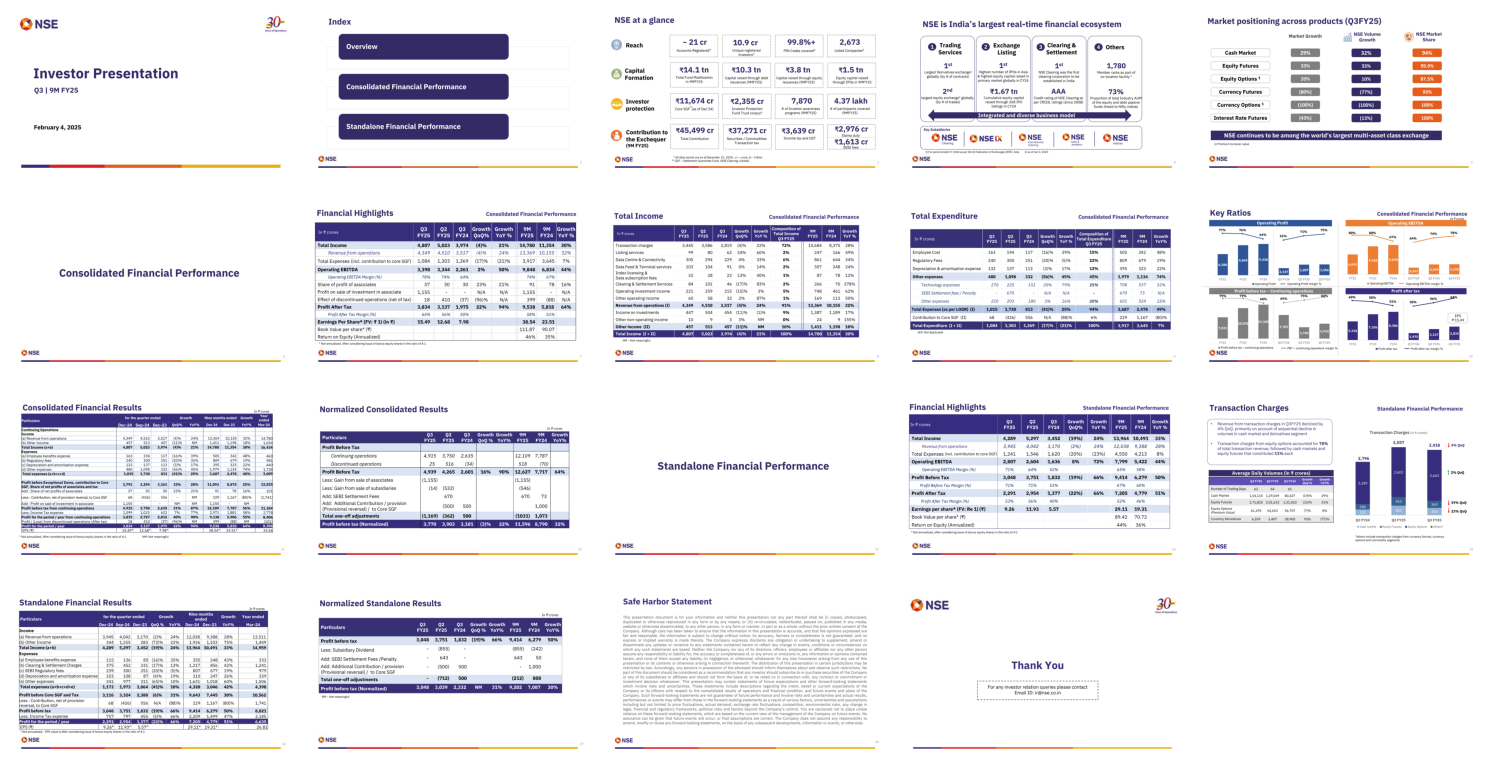

In [18]:
#iterate through pages
import matplotlib.pyplot as plt
import math

# Display the pages or images
def display_images(images, images_per_row=5, figsize=(15, 8)):
    # Handle dictionary or list input
    if isinstance(images, dict):
        images = list(images.values())

    # Calculate number of rows needed
    num_rows = math.ceil(len(images) / images_per_row)

    # Create subplots
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=figsize)
    axes = axes.flatten()  # Flatten axes for easier iteration

    # Plot images
    for ax, image in zip(axes, images):
        ax.imshow(image)
        ax.axis('off')

    # Turn off unused axes
    for ax in axes[len(images):]:
        ax.axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
# I am using this function to simply display all the images, so it simply uses the matplotlib subplots to nicely
#organise all these images in our document. Using this we can extract all the pictures from the document and show them
#as well as use it to extract all the pages and images and show it, So this can be useful in various analysis

page_images = [page.image.pil_image for page_no, page in conv_res.document.pages.items()] # page images if you can 
#remember from the pipeline we have enabled one option pipeline_options.generate_page_image =True which means all the
#pages will be converted into images and will be paused along with the document docling parsing, with the above line of
#code you can get the which page it is page number along with page as a image
display_images(page_images, images_per_row=5, figsize=(15, 8))



In [19]:
import os

# Save page images to a local directory
dir_path = "C:\\Users\\ramum\\Document-analysis\\images\\pdf_page_images"
os.makedirs(dir_path, exist_ok=True)

for page_no, page in conv_res.document.pages.items():
    page_no = page.page_no
    page_image_filename = f"{page_no}.png"
    
    with open(os.path.join(dir_path, page_image_filename), "wb") as fp:
        page.image.pil_image.save(fp, format="PNG")


In [20]:
import os

# Output directory
dir_path = "C:\\Users\\ramum\\Document-analysis\\images\\pdf_actual_images"
os.makedirs(dir_path, exist_ok=True)

images_list = []
image_number = 1
#Extract all the images from the document
# Iterate through document elements
for element, _ in conv_res.document.iterate_items():
    # Check if element supports image extraction
    if hasattr(element, "get_image"):
        try:
            image = element.get_image(conv_res.document)
            image_filename = os.path.join(dir_path, f"{image_number}.png")
            
            with open(image_filename, "wb") as fp:
                image.save(fp, format="PNG")
                images_list.append(image)
            
            image_number += 1
        except Exception as e:
            print(f"Skipping image #{image_number} due to error: {e}")


In [21]:
import os
import pandas as pd
# from docling.datamodel.base_models import TableItem  # Use only if your version supports it

# Define output directories
dir_path = "C:\\Users\\ramum\\Document-analysis\\tables"
dir_paths = [f"{dir_path}/images", f"{dir_path}/CSVs", f"{dir_path}/HTMLs"] # This code will extract images, write
[os.makedirs(path, exist_ok=True) for path in dir_paths]

table_list = []
table_number = 1

# Iterate through document elements
for element, _level in conv_res.document.iterate_items():
    # Check if element is a table (use hasattr instead of TableItem to avoid import issues)
    if hasattr(element, "get_image") and hasattr(element, "export_to_dataframe"):

        # Save table as image
        element_table_filename = os.path.join(dir_paths[0], str(table_number) + ".png")
        with open(element_table_filename, "wb") as fp:
            table_image = element.get_image(conv_res.document)
            table_image.save(fp, "PNG")
            table_list.append(table_image)

        # Save table as CSV
        table_df = pd.DataFrame(element.export_to_dataframe())
        element_table_filename = os.path.join(dir_paths[1], str(table_number) + ".csv")
        table_df.to_csv(element_table_filename, index=False)

        # Save table as HTML
        table_html = element.export_to_html()
        element_table_filename = os.path.join(dir_paths[2], str(table_number) + ".html")
        with open(element_table_filename, "w", encoding="utf-8") as fp:
            fp.write(table_html)

        table_number += 1


Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.
Usage of TableItem.export_to_html() without `doc` argument is deprecated.


## OCR Enable
Some times we have documents with scanned copies which can be images basically , most of the document parsers
struggle to extract documents.

# How we can use docling for the OCR example

In [22]:
from pathlib import Path
import time
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.pipeline_options import PdfPipelineOptions, EasyOcrOptions
from docling.datamodel.base_models import InputFormat

#The below function is OCR enabled pipeline with DOCLING
#Building OCR enabled pipeline
def OCR_parsing(doc_path):
    input_doc = Path(doc_path)
    #OCR enabled pipeline with docling, We need to create pipeline for this we can use same pipeline for enable to be
    #ocr options here we are activating a new pipeline 
    pipeline_options = PdfPipelineOptions()  #creating a new pipeline 
    pipeline_options.do_ocr = True # Enables text extraction from scanned images
    pipeline_options.do_table_structure = True #Activates table detection logic
    pipeline_options.table_structure_options.do_cell_matching = True #Enables cell matching logic inside table extraction.
    ocr_options = EasyOcrOptions(force_full_page_ocr=True) #Ensures complete OCR even for mixed content
    pipeline_options.ocr_options = ocr_options #Injects the previously defined OCR options (EasyOcrOptions) into the overall PDF pipeline.
    pipeline_options.generate_page_images = True # Tells Docling to generate full-page images (like thumbnails) from each page.

    start_time = time.time()
    #Parsing this pipeline options inside my DocumentConverter object
    converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
        }
    )

    result = converter.convert(input_doc)
    end_time = time.time() - start_time

    print(f"Total time taken for parsing: {end_time:.2f} seconds.")
    return result


C:\Users\ramum\anaconda3\envs\financial-env\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Total time taken for parsing: 1810.51 seconds.
Docling Extract
<!-- image -->

## Investor Presentation Q3 | 9M FY25

<!-- image -->

## Index

<!-- image -->

<!-- image -->

## NSE at a glance

<!-- image -->

| Reach                                  | ~ 21 cr Accounts Registered*                                                       | 10.9 cr Unique registered investors*                      | 99.8%+ PIN Codes covered*                             | 2,673 Listed Companies*              |
|----------------------------------------|------------------------------------------------------------------------------------|-----------------------------------------------------------|-------------------------------------------------------|--------------------------------------|
| Total ₹                                | Fund Mobilization Capital raised through debt issuances (9MFY25) 14.1 tn ₹ 10.3 tn | Capital raised through equity issuances (9MFY25) ₹ 3.8 tn | Equity capital raised through IPOs

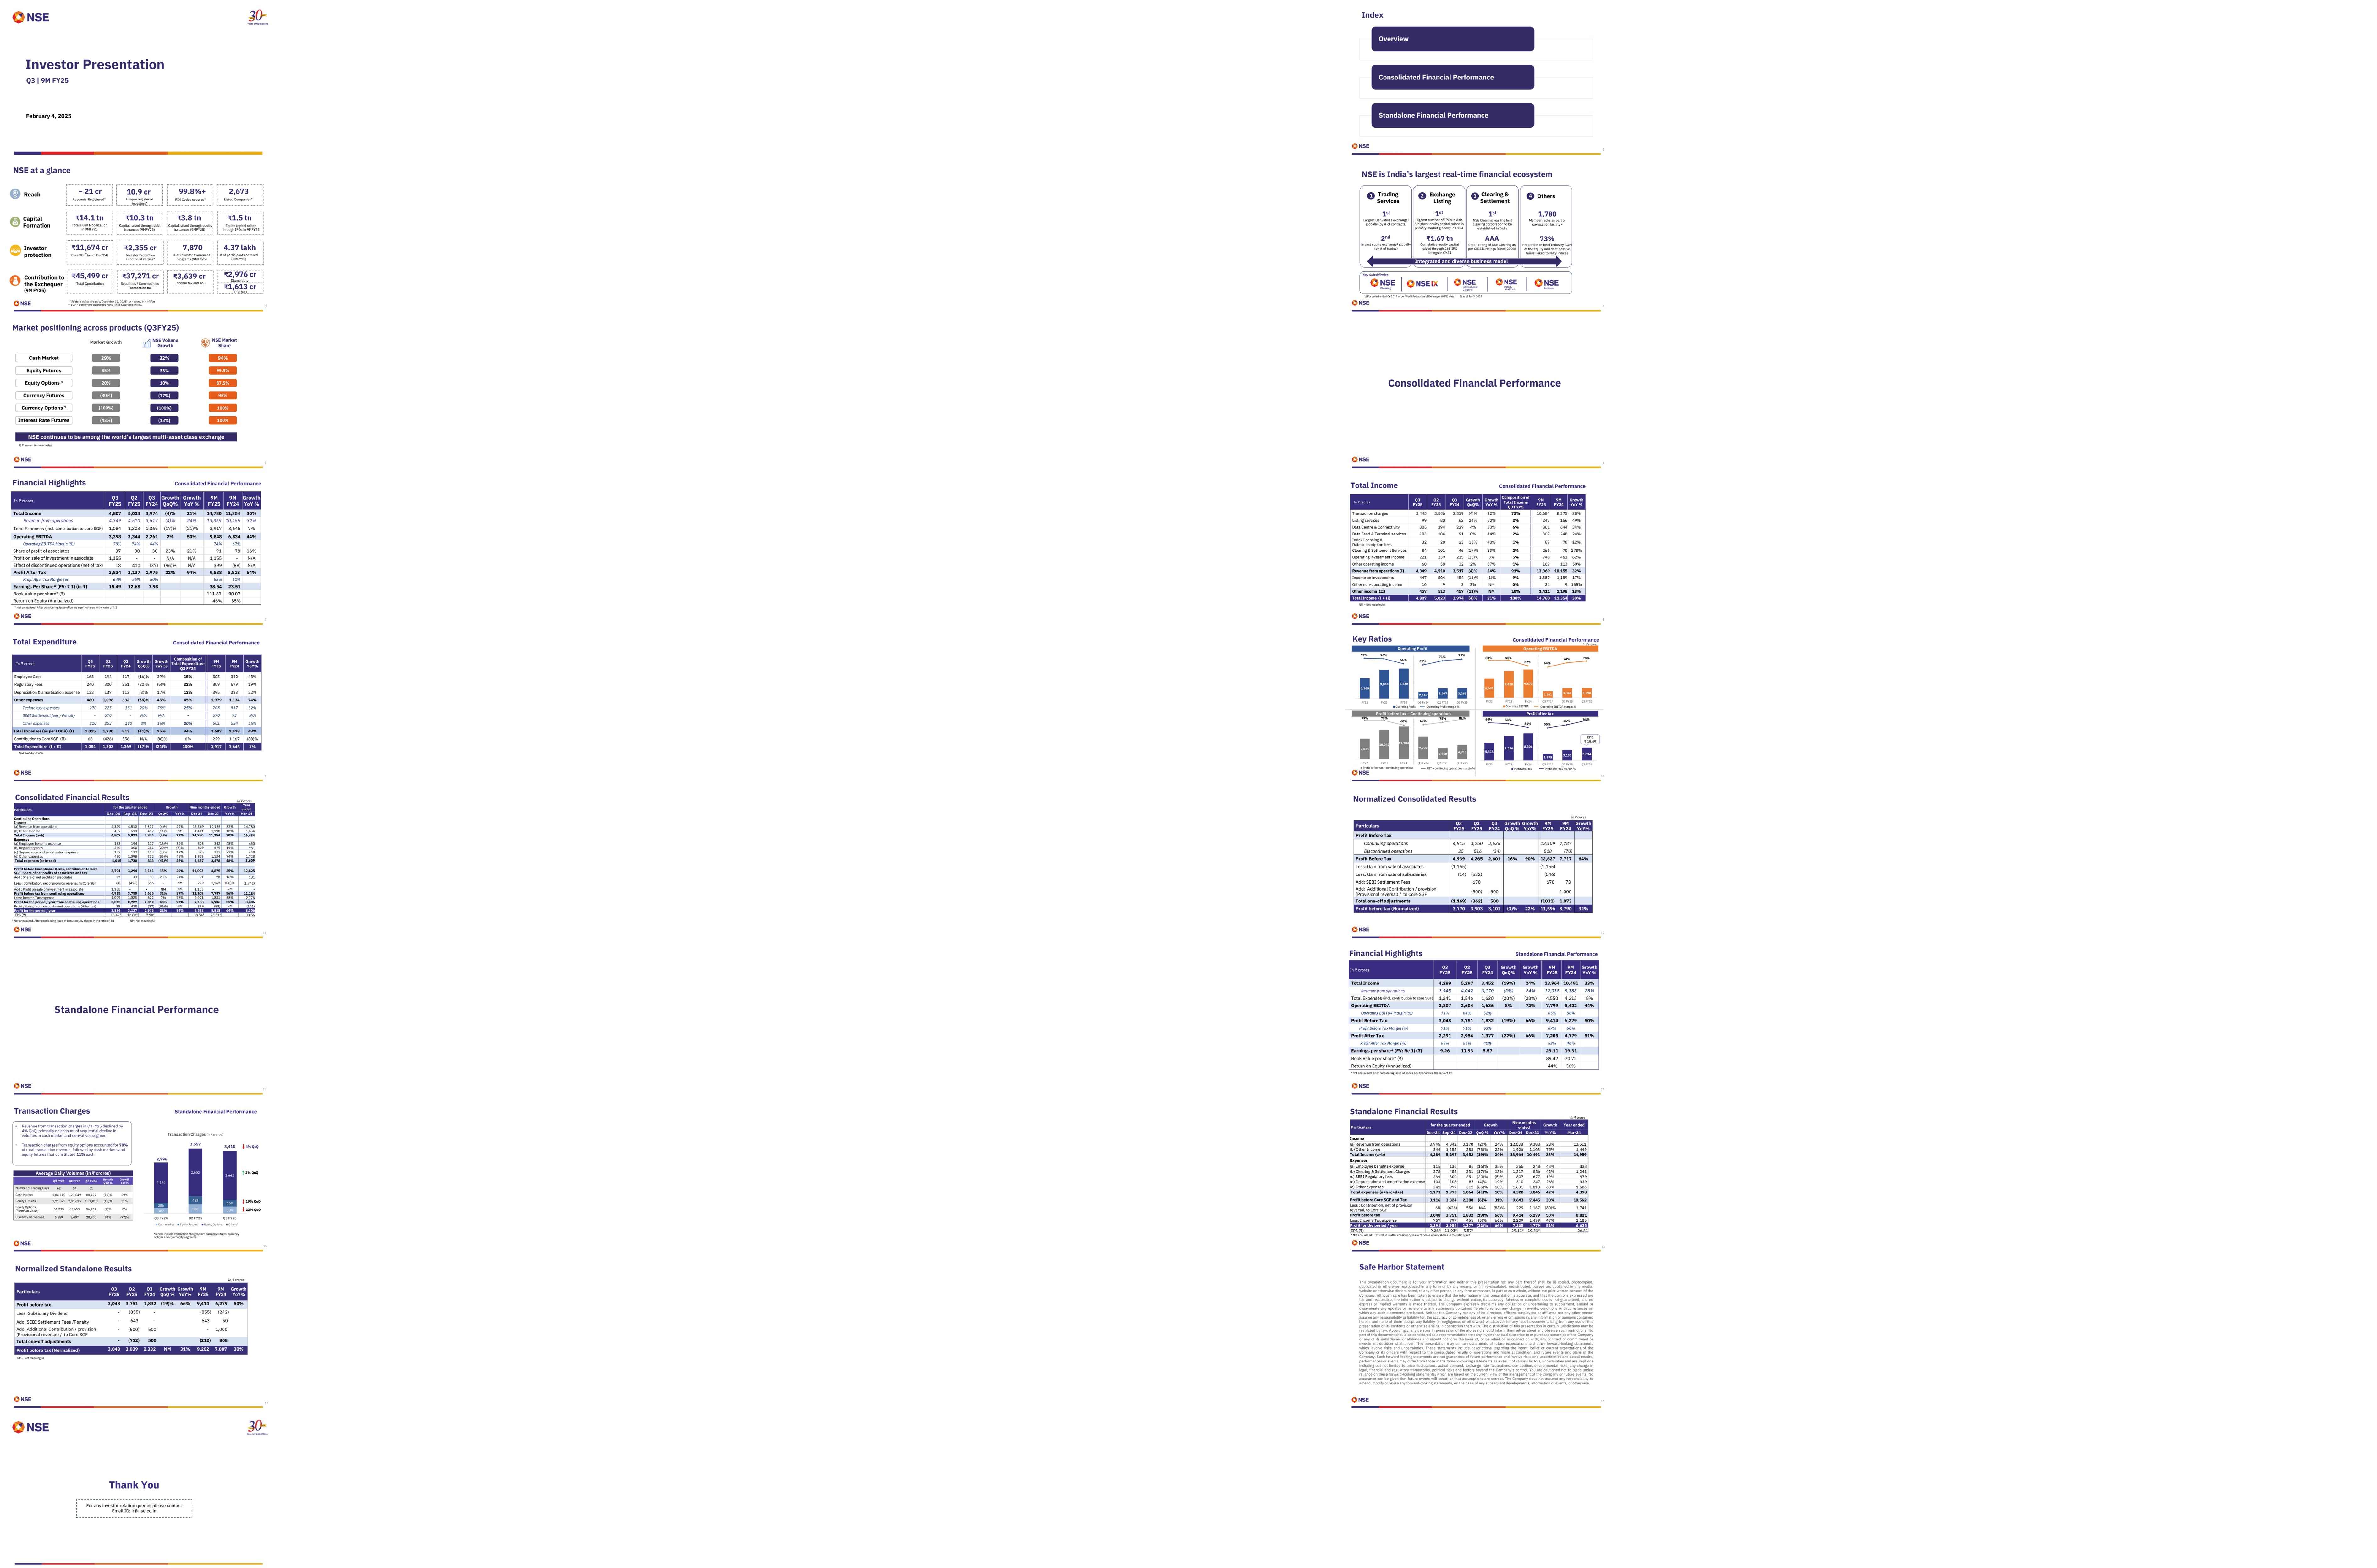

In [23]:
# Run OCR parsing on the normal pdf document
OCR_result = OCR_parsing("C:\\Users\\ramum\\Q3FY25 Earnings Presentation V16.pdf")

# Export the extracted content to markdown
extract = OCR_result.document.export_to_markdown()
print("Docling Extract")
print(extract) #Printing the extracted text content from it 

# Display the actual document pages
page_images = [page.image.pil_image for page_no, page in OCR_result.document.pages.items()]
print("Actual Document") #It will show the actual document which is exactly in  our pdf.
display_images(page_images, images_per_row=2, figsize=(100, 50))


Total time taken for parsing: 106.24 seconds.
Docling Extract
<!-- image -->

## THE SLEREXE COMPANY LIMITED

SAPORS LANE BOOLE DORSET BH 25 8 ER TELEPHONE BOOLE (945 13) 51617

<!-- image -->

Our Ref - 350 /PJC /EAC

l8th January , 1972

Dr P .N. Cundall , Holroyd Road , Reading, Berks

Dear Pete,

Permit me to introduce you to the facility of facsimile transmission.

In facsimile a photocell is caused to perform a raster scan over the subject copy \_ Ihe variations of print density on the document cause the photocell to generate an analogous electrical video signal\_ Ihis signal is used to modulate a carrier, which is transmitted to a remote destination over a radio or cable communications link \_

At the remote terminal demodulation reconstructs the video signal, which is used to modulate the density of print produced by a printing device \_ Ihis device is scanning in a raster scan synchronised with at the transmitting terminal\_ As a result, a facsinile copy of the subject documen

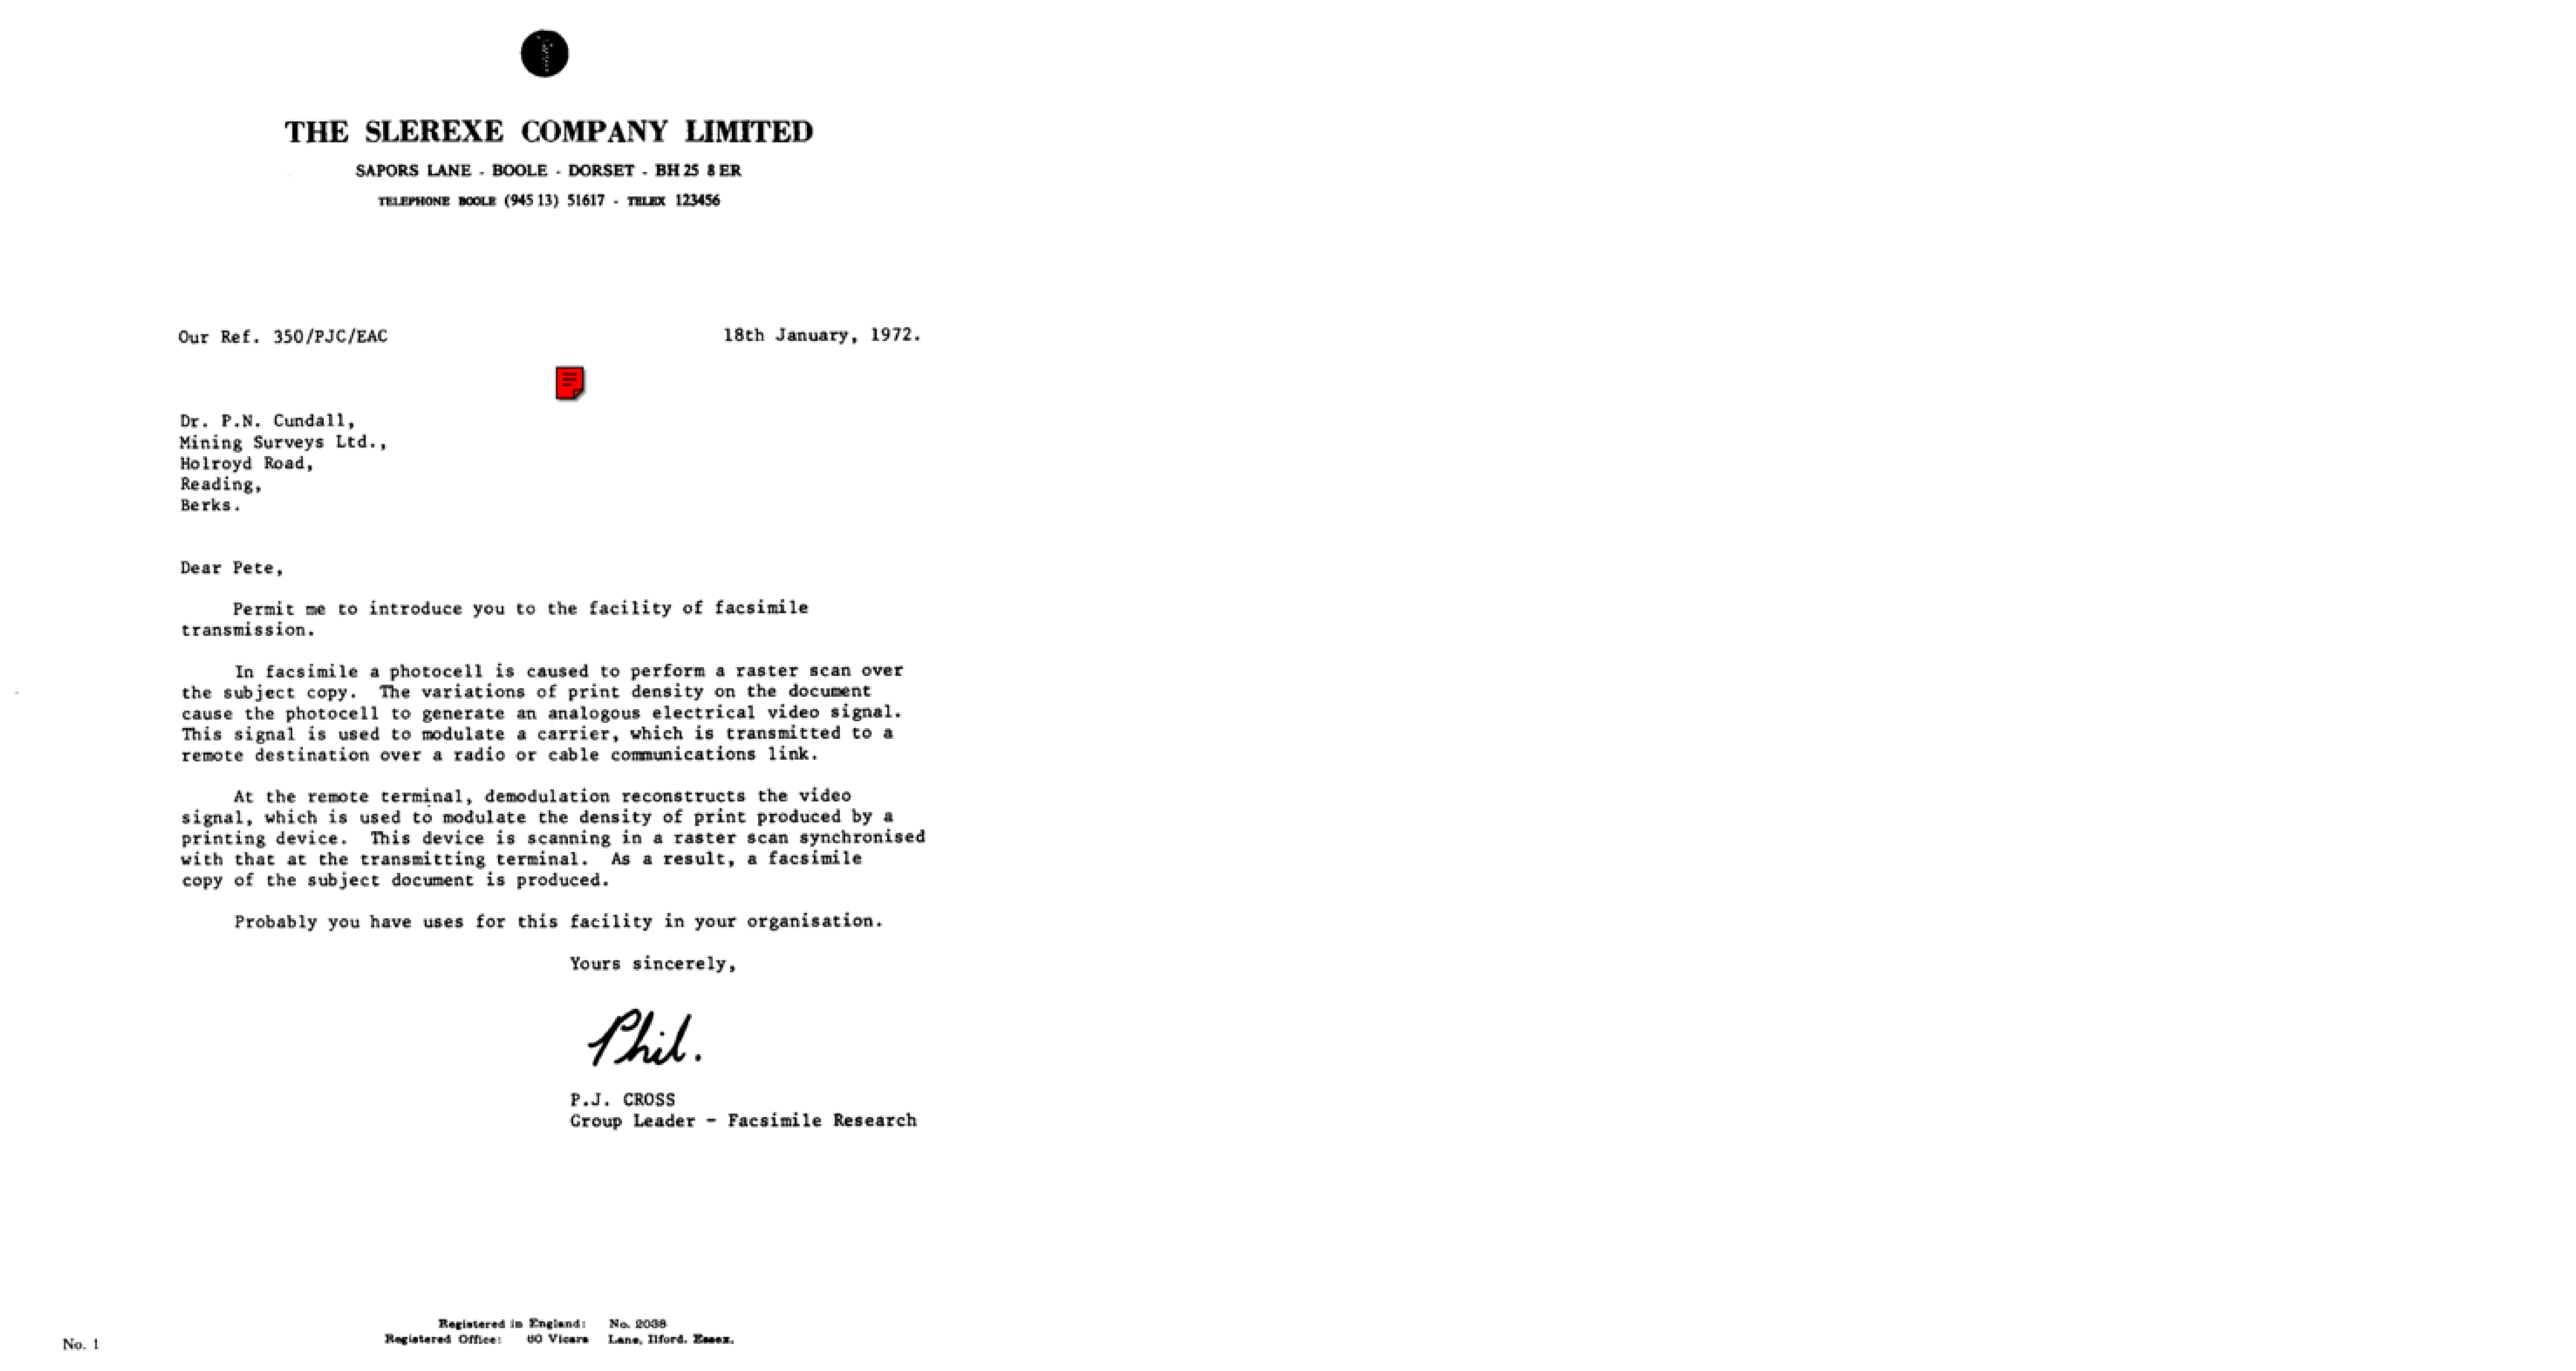

In [24]:
# Perform OCR on the scanned pdf
OCR_result = OCR_parsing("C:\\Users\\ramum\\scansmpl.pdf")

# Extract text content in markdown format
extract = OCR_result.document.export_to_markdown()
print("Docling Extract")
print(extract)

# Display pages as images
page_images = [page.image.pil_image
    for page_no, page in OCR_result.document.pages.items()
    if page.image is not None and page.image.pil_image is not None]
print("Actual Document")
display_images(page_images, images_per_row=2, figsize=(100, 50))
#If we parse any mis interupted text we are getting now on scanned to pdf to language model it can fill some of the
#missing part , it can fix some issues . it can combine the seperated words etc. But still the content wise 
#it has done good job to extract from the scanned document.

# 🧾 Document Analysis Using Python PDF Libraries

This project demonstrates a backend approach to extract, analyze, and benchmark table/text data from financial documents (like quarterly reports) using three powerful Python libraries:

- 📄 **pdfplumber**
- 📄 **PyMuPDF (fitz)**
- 🧠 **Docling (traditional structured parsers and fine-tuned models from Hugging Face if we are working in advanced setting with metadata)**

---

## 🔧 Packages Used

| Package      | Purpose                                      |
|--------------|----------------------------------------------|
| `pdfplumber` | Accurate table + text extraction from PDFs   |
| `PyMuPDF`    | PDF parsing, structured block detection      |
| `docling`    | traditional structured parsers  |

---

## 📁 Notebook Overview

The `3packages_backend_understanding.ipynb` file contains:

1. **Text & Table Extraction (pdfplumber):**
   - Loop through each page
   - Extract page-wise text
   - Extract and display tabular data
   - Store performance timing

2. **Text Block & Table Analysis (PyMuPDF):**
   - Analyze font sizes to find section titles
   - Extract and label each table
   - Measure performance time

3. **Semantic Parsing (Docling):**
   - Convert financial PDFs to Markdown via traditional structured parsers.
   - Use regex to extract table from the markdown text
   - Time the steps: initialization, conversion, export

---

## 📊 Profiling Metrics

Each method includes:
- Execution time benchmarking (`time.time()`)
- Print/display of extracted tables
- Optional conversion to CSV or JSON (extensible)

---

## 📂 Directory Structure

```
Documents_analysis_with_multiple_packages/
│
├── 3packages_backend_understanding.ipynb  # Main notebook
├── tables/                                # (Optional) extracted tables CSV
├── README.md                              # Project summary
└── requirements.txt                       # Dependencies
```

---

## 📌 How to Run

1. Install dependencies:

```bash
pip install pdfplumber PyMuPDF docling pandas
```

2. Run the notebook:

```bash
jupyter notebook 3packages_backend_understanding.ipynb
```

3. (Optional) Extract tables to `.csv` and visualize performance metrics.

---

## 📈 Use Case

Designed for analysts or engineers needing:
- PDF and scanned Pdf financial document parsing
- Automated extraction of Income Statements, Balance Sheets
- Verification of values (e.g., matching Net Income)
- Comparison across quarterly financial results

---
# IBM Docling: OCR-Enabled PDF Parsing Guide

## Introduction

IBM Docling is a **free and open-source** document parsing tool that excels in extracting structured content from documents—such as text, tables, and images—without using large language models (LLMs) during the parsing phase. This unique design provides several benefits in terms of **cost, privacy**, and **control**.

---

## Key Features

### 1. Free and Open Source

Docling is completely free to use and can be installed locally. This makes it accessible to both individuals and organizations without any commercial license or subscription fees.

### 2. No Use of LLMs During Parsing

Unlike tools such as LlamaParse that depend on LLMs to parse documents, Docling avoids using any large models during parsing:

* **No token cost:** Using LLMs incurs token usage and cost, which Docling avoids.
* **Privacy-safe:** Tools using LLMs often send your data to cloud-based models, creating potential privacy concerns. Docling ensures your sensitive documents remain local.
* **Security:** Whether LLMs use private or public infrastructure, they can potentially see and store document contents. Docling sidesteps this entirely by working locally.

### 3. Structured Extraction Powered by Hugging Face Models

Docling uses specialized, fine-tuned extractors from Hugging Face to detect and structure tables, text blocks, figures, and other visual elements:

* Provides output in structured formats.
* Enables precise alignment of text with tables and images.
* Great for downstream tasks like feeding into language models, generating analytics, or document summarization.

---

## Use Case Benefits

* Docling outperforms other open-source alternatives like PyMuPDF and Unstructured when it comes to extracting and organizing **complex document structures**.
* Particularly effective for **financial presentations**, **scanned documents**, **invoices**, **balance sheets**, and **multi-format files**.

---

## Advanced Feature Support

To achieve advanced extraction with Docling, you need to configure pipeline options:

* **Images Scale & Generation:**

  * Convert pages into high-resolution images.
  * Enables use with vision-enabled language models.

* **Pipeline Customization:**

  * Use `PdfPipelineOptions` to activate OCR, table extraction, image capture, and other options.
  * Extracted pages and text units carry metadata such as `page_no`, `reference id`, and type (text, image, table).

* **Document Type Awareness:**

  * Docling supports parsing of **PDF**, **PPTX**, **DOCX**, and **HTML** formats.
  * You can access the document’s `mimetype`, `filename`, and more metadata.

---

## OCR Pipeline Explanation

Some documents—especially scanned ones—contain text that cannot be extracted using standard parsers. OCR becomes essential in these cases. Below is a breakdown of how Docling enables OCR:

### Pipeline Configuration Components

* `do_ocr = True`: Enables Optical Character Recognition.
* `do_table_structure = True`: Enables detection of tables and structural relationships.
* `do_cell_matching = True`: Enables accurate mapping of rows/columns even for misaligned or merged cells.
* `generate_page_images = True`: Generates full-page thumbnails of each document page.
* `ocr_options = EasyOcrOptions(force_full_page_ocr=True)`: Ensures the entire page is processed for OCR, not just regions where text is missing.

### Behavior of `force_full_page_ocr`

| Setting           | Description                                                      |
| ----------------- | ---------------------------------------------------------------- |
| `False` (default) | OCR runs only on scanned/image content.                          |
| `True`            | OCR runs on the entire page regardless of embedded digital text. |

---

## What Does “Text Cannot Be Extracted Normally” Mean?

* **Digital PDF**: Selectable text (e.g., Ctrl+C works) → Docling uses built-in extractors.
* **Scanned PDF**: Pages are images (e.g., photos of printed text) → Requires OCR.
* **Mixed Content**: Partly text, partly scanned → OCR is selectively applied unless forced fully.

---

## Reference Mapping and Metadata

Every document processed through Docling is internally represented as a structured JSON-like model that contains metadata at multiple levels—document, page, and content element. This metadata is critical for automation, indexing, linking, and advanced analysis.

### Core Metadata Elements

Each content block extracted from the document is associated with the following key metadata fields:

* **`self_ref`**: A unique identifier for the content unit (text, image, table, etc.). Useful for referencing or tracking specific items.
* **`page_no`**: Indicates which page the content appears on. Important for reconstructing the document's visual structure.
* **`text`**: The actual content of the text block. This could be a sentence, paragraph, or a fragment, depending on the layout.
* **`type`**: Defines the nature of the content element (e.g., `text`, `table`, `picture`, `title`, `header`, `footer`).
* **`prov`**: A provenance field showing where and how the content was derived (including page number, region, and engine used).
* **`group`**: Used for grouping related content units, such as multi-column text blocks or table-cell clusters.
* **`image`**: For picture or page-based elements, this holds the image data or reference to the image object.

### Examples

#### Example 1: Text Metadata

```json
{
  "self_ref": "text_3ac4",
  "page_no": 2,
  "text": "Revenue increased by 10% year over year...",
  "type": "text",
  "prov": [{"page_no": 2, "source": "ocr"}]
}
```

#### Example 2: Image Metadata

```json
{
  "self_ref": "img_9f1b",
  "page_no": 4,
  "type": "picture",
  "image": {"format": "jpeg", "width": 1200, "height": 1600},
  "prov": [{"page_no": 4}]
}
```

#### Example 3: Table Metadata

```json
{
  "self_ref": "table_b12f",
  "page_no": 3,
  "type": "table",
  "rows": 5,
  "cols": 4,
  "prov": [{"page_no": 3, "source": "structure_extractor"}]
}
```

### Why This Metadata Matters

* **Automated Linking**: Easily map text to associated tables or visual references.
* **Intelligent Chunking**: Group and structure content for LLMs or API pipelines.
* **Search and Indexing**: Build fast and accurate document search systems.
* **Data Provenance**: Track how and where each piece of content was extracted.
* **Audit and Debug**: Inspect pipeline decisions for data validation or correction.

This rich metadata structure makes Docling not just a parser but a foundational tool for robust document understanding and automation workflows.
Every extracted text unit contains:

* `self_ref`: Unique ID to track or map content.
* `page_no`: Which page the content belongs to.
* `text`: The raw content itself.

This enables powerful document analysis features such as:

* **Linking text to images/tables**
* **Chunking for downstream NLP tasks**
* **Precise display and review of document structure**

---

## Visual Image Display

Docling enables rendering of images and scanned pages:

* Page images are helpful when passing data to models like GPT-4V.
* Thumbnails of full pages or pictures in the document can be shown with `display_images()`.

---

## Real-World Applications

* **Financial statement processing**
* **Scanned bill parsing**
* **Earnings report summarization**
* **Regulatory or legal document analysis**

OCR can also resolve errors such as broken characters, misplaced word breaks, or faded text by applying machine-learned techniques like EasyOCR to the full page.

---

## Summary Table of OCR Configuration Options

| Option                        | Description                                                      |
| ----------------------------- | ---------------------------------------------------------------- |
| `do_ocr`                      | Enables OCR on scanned or image-based pages                      |
| `do_table_structure`          | Turns on advanced table boundary and layout detection            |
| `do_cell_matching`            | Matches complex tables accurately with cell coordinates          |
| `force_full_page_ocr = False` | OCR only on missing areas (default)                              |
| `force_full_page_ocr = True`  | Full-page OCR on all content for maximum capture                 |
| `generate_page_images`        | Outputs images of each document page for visualization/debugging |

---

## Additional Insight on OCR Performance

In scenarios involving scanned or partially corrupted documents, Docling's OCR capability shines. If there is any misinterpreted or broken text—such as hyphenated or separated words—feeding the OCR-parsed output to a language model (LLM) can significantly improve the outcome. The LLM can intelligently:

* Fill in missing parts
* Merge incorrectly split text spans
* Correct layout inconsistencies

Even though the raw OCR output might have minor issues, the overall content extracted is accurate and usable for further processing.

## Conclusion

Docling provides a powerful and privacy-safe alternative to LLM-powered document parsing tools. It is ideally suited for users dealing with sensitive documents and needing high-accuracy parsing, structured extraction, and integration with downstream AI models.

By leveraging Hugging Face-based extractors and local OCR engines like EasyOCR or Tesseract, Docling offers a strong balance of accuracy, flexibility, and control.

If you're processing documents at scale or working in finance, law, or research, Docling’s structured parsing pipelines are a perfect fit.

